In [2]:
# Estructura del Proyecto

# 1. Presentación del Problema de Negocio
# Define claramente el problema que quieres resolver.
# Ejemplo: "Reducir la mortalidad por cáncer de mama mediante la detección temprana basada en imágenes médicas."
# Explica por qué es importante resolver este problema y su impacto en la sociedad o en el negocio.

# 2. Planteamiento del Problema Técnico
# Describe cómo el problema técnico se conecta con el problema de negocio.
# Ejemplo: "Construir un modelo de clasificación que identifique tumores malignos en imágenes de mamografías con alta precisión."
# Define el objetivo técnico: ¿Clasificación, regresión, clustering, etc.?

# 3. Dataset y Análisis Exploratorio de Datos (EDA)
# Explica el origen del dataset (fuente, tamaño, calidad).
# Realiza un análisis exploratorio:
# Distribución de las variables.
# Relación entre las variables predictoras y el target (si aplica).
# Identificación de valores atípicos, datos faltantes, etc.
# Visualizaciones clave para respaldar tus hallazgos.

# 4. Arquitectura de la Solución
# Explica los modelos probados (algoritmos de ML/DL).
# Comparativa de resultados (métricas como precisión, recall, F1-score, etc.).
# Justifica la selección del modelo final.
# Si usaste Deep Learning, describe la arquitectura de la red neuronal (capas, activaciones, optimizador, etc.).
# Incluye gráficos de aprendizaje (curvas de pérdida, precisión, etc.).

# 5. Resultados
# Presenta los resultados del modelo final en el conjunto de test.
# Si es un problema supervisado, incluye métricas clave.
# Si es un problema no supervisado, muestra agrupaciones o insights obtenidos.

# 6. Conclusiones y Acciones de Mejora
# Resume los hallazgos principales.
# Explica cómo tu solución ayuda a resolver el problema de negocio.
# Propón mejoras futuras (más datos, ajuste de hiperparámetros, nuevas técnicas, etc.).
# Entregables
# Repositorio en GitHub:

# Incluye:
# Código bien documentado.
# Notebooks con EDA, entrenamiento y evaluación del modelo.
# Archivos necesarios para reproducir el proyecto (requisitos, datasets, etc.).


# Vídeo de Presentación:
# Duración: 5-10 minutos.
# Estructura sugerida:
# Introducción al problema.
# Explicación técnica del enfoque.
# Resultados obtenidos.
# Conclusiones y próximos pasos.
# Consejos para la Presentación
# Usa gráficos y visualizaciones para explicar tus resultados.
# Sé claro y conciso al explicar conceptos técnicos.
# Practica para mantenerte dentro del tiempo límite.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Configuración para mostrar todas las columnas
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv(r'C:\BOOTCAMP_DATA_SCIENCE\Proyecto ML_CancerPredictionModel\ML_Cancer_Prediction_Models\src\data_sample\cancer patient data sets.csv')

df.set_index('index', inplace=True)

df.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
index,,,,,,,,,,,,,,,,,,,,,,,,,
0,P1,33,1,2,4,5,4,3,2,2,4,3,2,2,4,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,2,2,4,2,3,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,7,2,3,4,8,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,7,7,7,7,8,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,7,8,7,7,9,3,2,4,1,4,2,4,2,3,High


In [5]:
# Cambiar los nombres de las columnas a español
df.columns = [
    "ID del Paciente", "Edad", "Género", "Contaminación del Aire", 
    "Consumo de Alcohol", "Alergia al Polvo", "Riesgos Ocupacionales", 
    "Riesgo Genético", "Enfermedad Pulmonar Crónica", "Dieta Balanceada", 
    "Obesidad", "Fumar", "Fumador Pasivo", "Dolor de Pecho", 
    "Tos con Sangre", "Fatiga", "Pérdida de Peso", "Dificultad para Respirar", 
    "Sibilancias", "Dificultad para Tragar", "Acropaquia", "Resfriados Frecuentes", 
    "Tos Seca", "Ronquidos", "Nivel"
]

df.head()

,ID del Paciente,Edad,Género,Contaminación del Aire,Consumo de Alcohol,Alergia al Polvo,Riesgos Ocupacionales,Riesgo Genético,Enfermedad Pulmonar Crónica,Dieta Balanceada,Obesidad,Fumar,Fumador Pasivo,Dolor de Pecho,Tos con Sangre,Fatiga,Pérdida de Peso,Dificultad para Respirar,Sibilancias,Dificultad para Tragar,Acropaquia,Resfriados Frecuentes,Tos Seca,Ronquidos,Nivel
index,,,,,,,,,,,,,,,,,,,,,,,,,
0,P1,33,1,2,4,5,4,3,2,2,4,3,2,2,4,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,2,2,4,2,3,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,7,2,3,4,8,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,7,7,7,7,8,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,7,8,7,7,9,3,2,4,1,4,2,4,2,3,High


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ID del Paciente              1000 non-null   object
 1   Edad                         1000 non-null   int64 
 2   Género                       1000 non-null   int64 
 3   Contaminación del Aire       1000 non-null   int64 
 4   Consumo de Alcohol           1000 non-null   int64 
 5   Alergia al Polvo             1000 non-null   int64 
 6   Riesgos Ocupacionales        1000 non-null   int64 
 7   Riesgo Genético              1000 non-null   int64 
 8   Enfermedad Pulmonar Crónica  1000 non-null   int64 
 9   Dieta Balanceada             1000 non-null   int64 
 10  Obesidad                     1000 non-null   int64 
 11  Fumar                        1000 non-null   int64 
 12  Fumador Pasivo               1000 non-null   int64 
 13  Dolor de Pecho               1000 non-n

In [29]:
df.describe()

,Edad,Género,Contaminación del Aire,Consumo de Alcohol,Alergia al Polvo,Riesgos Ocupacionales,Riesgo Genético,Enfermedad Pulmonar Crónica,Dieta Balanceada,Obesidad,Fumar,Fumador Pasivo,Dolor de Pecho,Tos con Sangre,Fatiga,Pérdida de Peso,Dificultad para Respirar,Sibilancias,Dificultad para Tragar,Acropaquia,Resfriados Frecuentes,Tos Seca,Ronquidos
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,4.465000,3.948000,4.195000,4.438000,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,2.124921,2.495902,2.311778,2.280209,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,8.000000,8.000000,9.000000,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


In [7]:
df_es = df.copy()

def describe_df(df):
    # Creamons un diccionario para almacenar la información
    data = {
        'DATA_TYPE': df.dtypes,
        'MISSINGS(%)': df.isnull().mean() * 100,
        'UNIQUE_VALUES': df.nunique(),
        'CARDIN(%)': df.nunique() / len(df) * 100
    }
    # Creamos un nuevo DataFrame con la información recopilada, usamos 'transpose' para cambiar 
    # las filas por columnas.
    pacientes_df = pd.DataFrame(data).transpose()
    
    return pacientes_df

pacientes_df = describe_df(df_es)
pacientes_df


,ID del Paciente,Edad,Género,Contaminación del Aire,Consumo de Alcohol,Alergia al Polvo,Riesgos Ocupacionales,Riesgo Genético,Enfermedad Pulmonar Crónica,Dieta Balanceada,Obesidad,Fumar,Fumador Pasivo,Dolor de Pecho,Tos con Sangre,Fatiga,Pérdida de Peso,Dificultad para Respirar,Sibilancias,Dificultad para Tragar,Acropaquia,Resfriados Frecuentes,Tos Seca,Ronquidos,Nivel
DATA_TYPE,object,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,object
MISSINGS(%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UNIQUE_VALUES,1000,40,2,8,8,8,8,7,7,7,7,8,8,9,9,8,8,8,8,8,9,7,7,7,3
CARDIN(%),100.0,4.0,0.2,0.8,0.8,0.8,0.8,0.7,0.7,0.7,0.7,0.8,0.8,0.9,0.9,0.8,0.8,0.8,0.8,0.8,0.9,0.7,0.7,0.7,0.3


In [21]:
def clasificar_variables(df, umbral_categoria=10, umbral_discreta=20):
    """
    Clasifica las variables de un DataFrame en categóricas, discretas o continuas.
    
    Parámetros:
    - df: DataFrame de pandas.
    - umbral_categoria: Número máximo de valores únicos para considerar una variable como categórica.
    - umbral_discreta: Número máximo de valores únicos para considerar una variable como discreta.
    
    Retorna:
    - DataFrame con las columnas: 'Columna', 'Tipo de Variable', 'Tipo de Dato'.
    """
    clasificacion = []

    for col in df.columns:
        unique_values = df[col].nunique()
        dtype = df[col].dtype

        # Clasificación de las variables
        if dtype == 'object' or unique_values <= umbral_categoria:
            tipo_variable = "Categórica"
        elif dtype in ['int64', 'float64'] and unique_values <= umbral_discreta:
            tipo_variable = "Discreta"
        elif dtype in ['int64', 'float64']:
            tipo_variable = "Continua"
        else:
            tipo_variable = "Desconocido"

        # Añadir la información al resultado
        clasificacion.append({"Columna": col, "Tipo de Variable": tipo_variable, "Tipo de Dato": dtype})
    
    return pd.DataFrame(clasificacion)

# Aplicar la función
resultado = clasificar_variables(df_es)
resultado

,Columna,Tipo de Variable,Tipo de Dato
0,ID del Paciente,Categórica,object
1,Edad,Continua,int64
2,Género,Categórica,int64
3,Contaminación del Aire,Categórica,int64
4,Consumo de Alcohol,Categórica,int64
5,Alergia al Polvo,Categórica,int64
6,Riesgos Ocupacionales,Categórica,int64
7,Riesgo Genético,Categórica,int64
8,Enfermedad Pulmonar Crónica,Categórica,int64
9,Dieta Balanceada,Categórica,int64


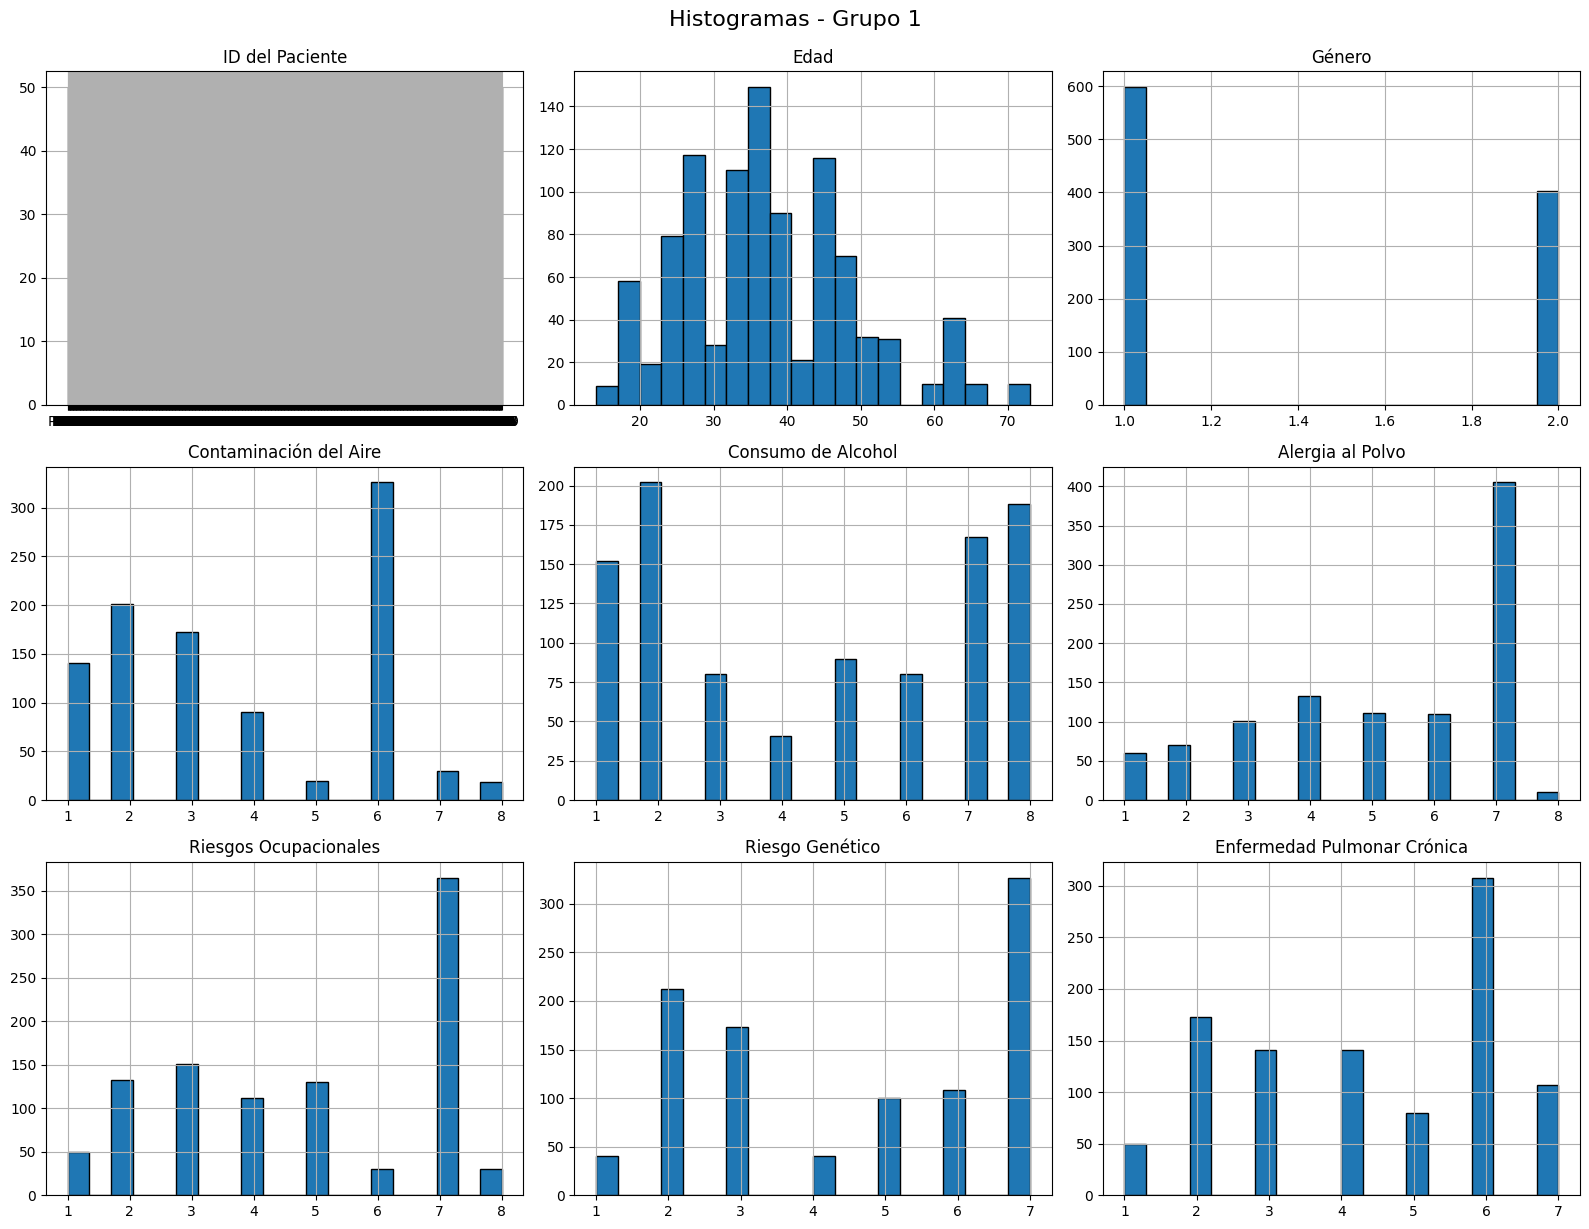

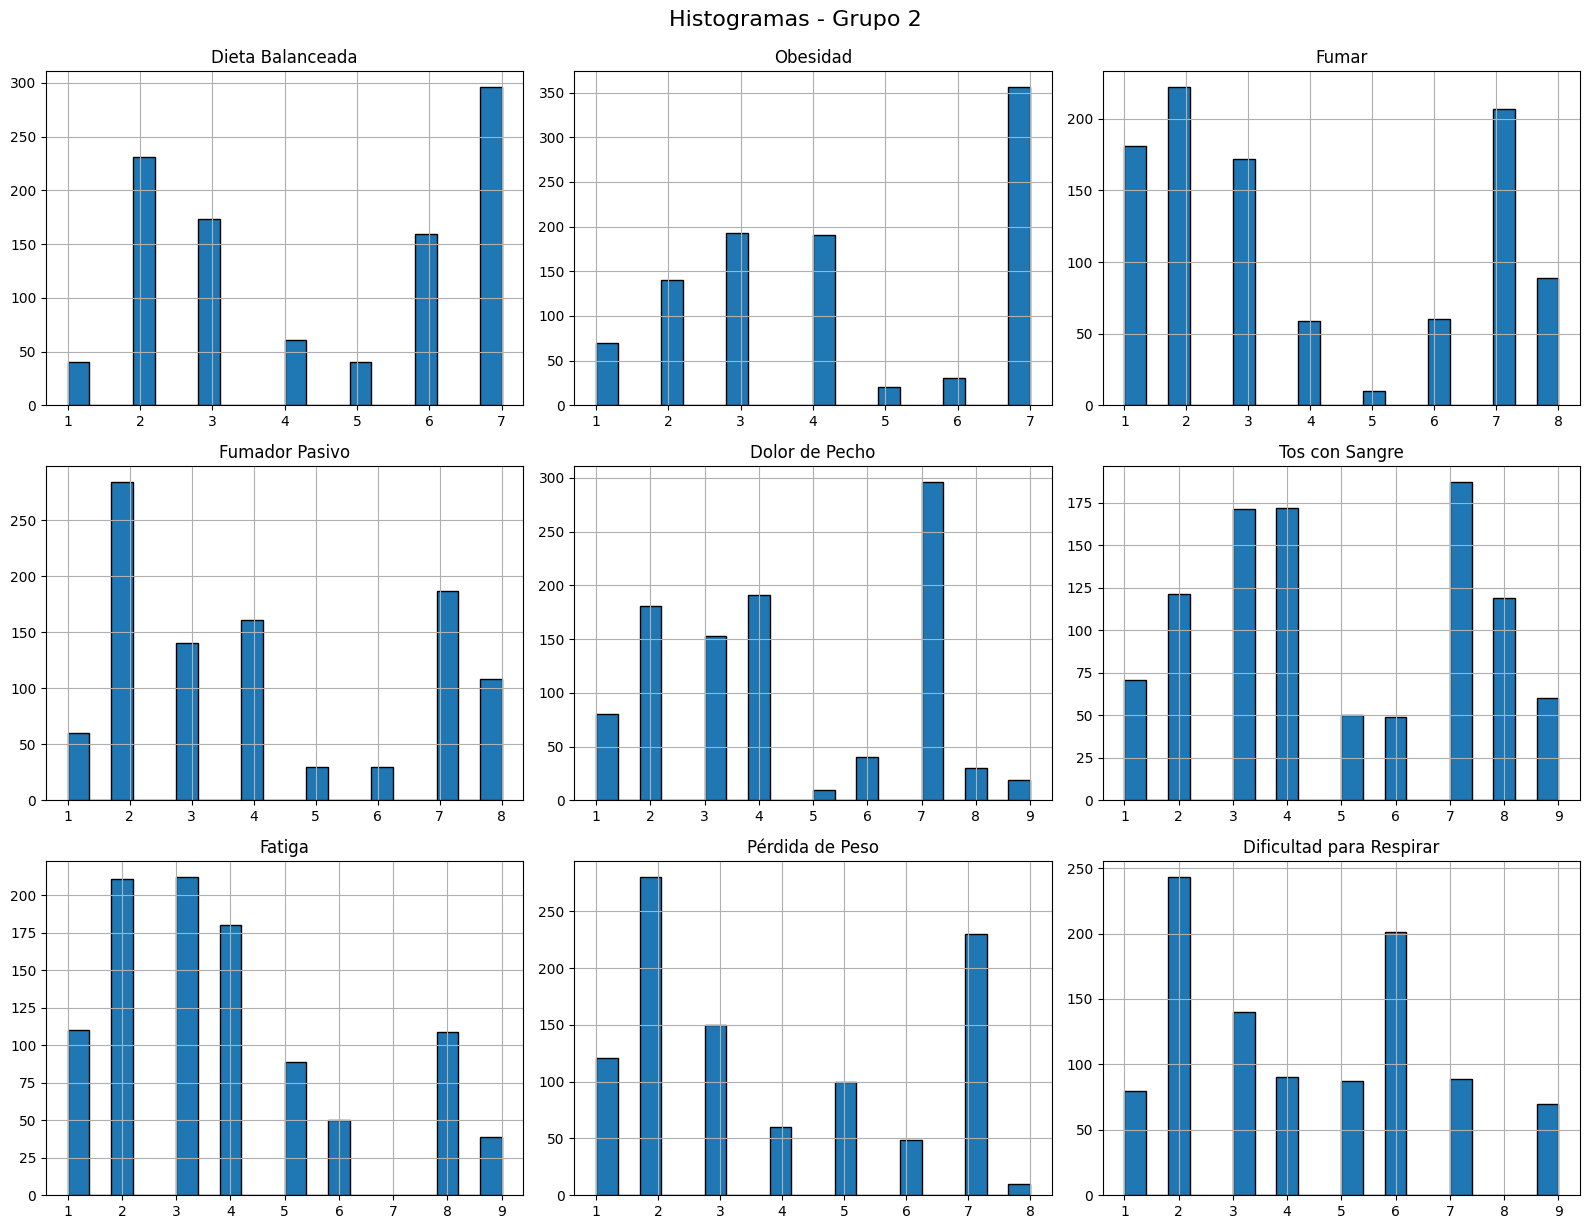

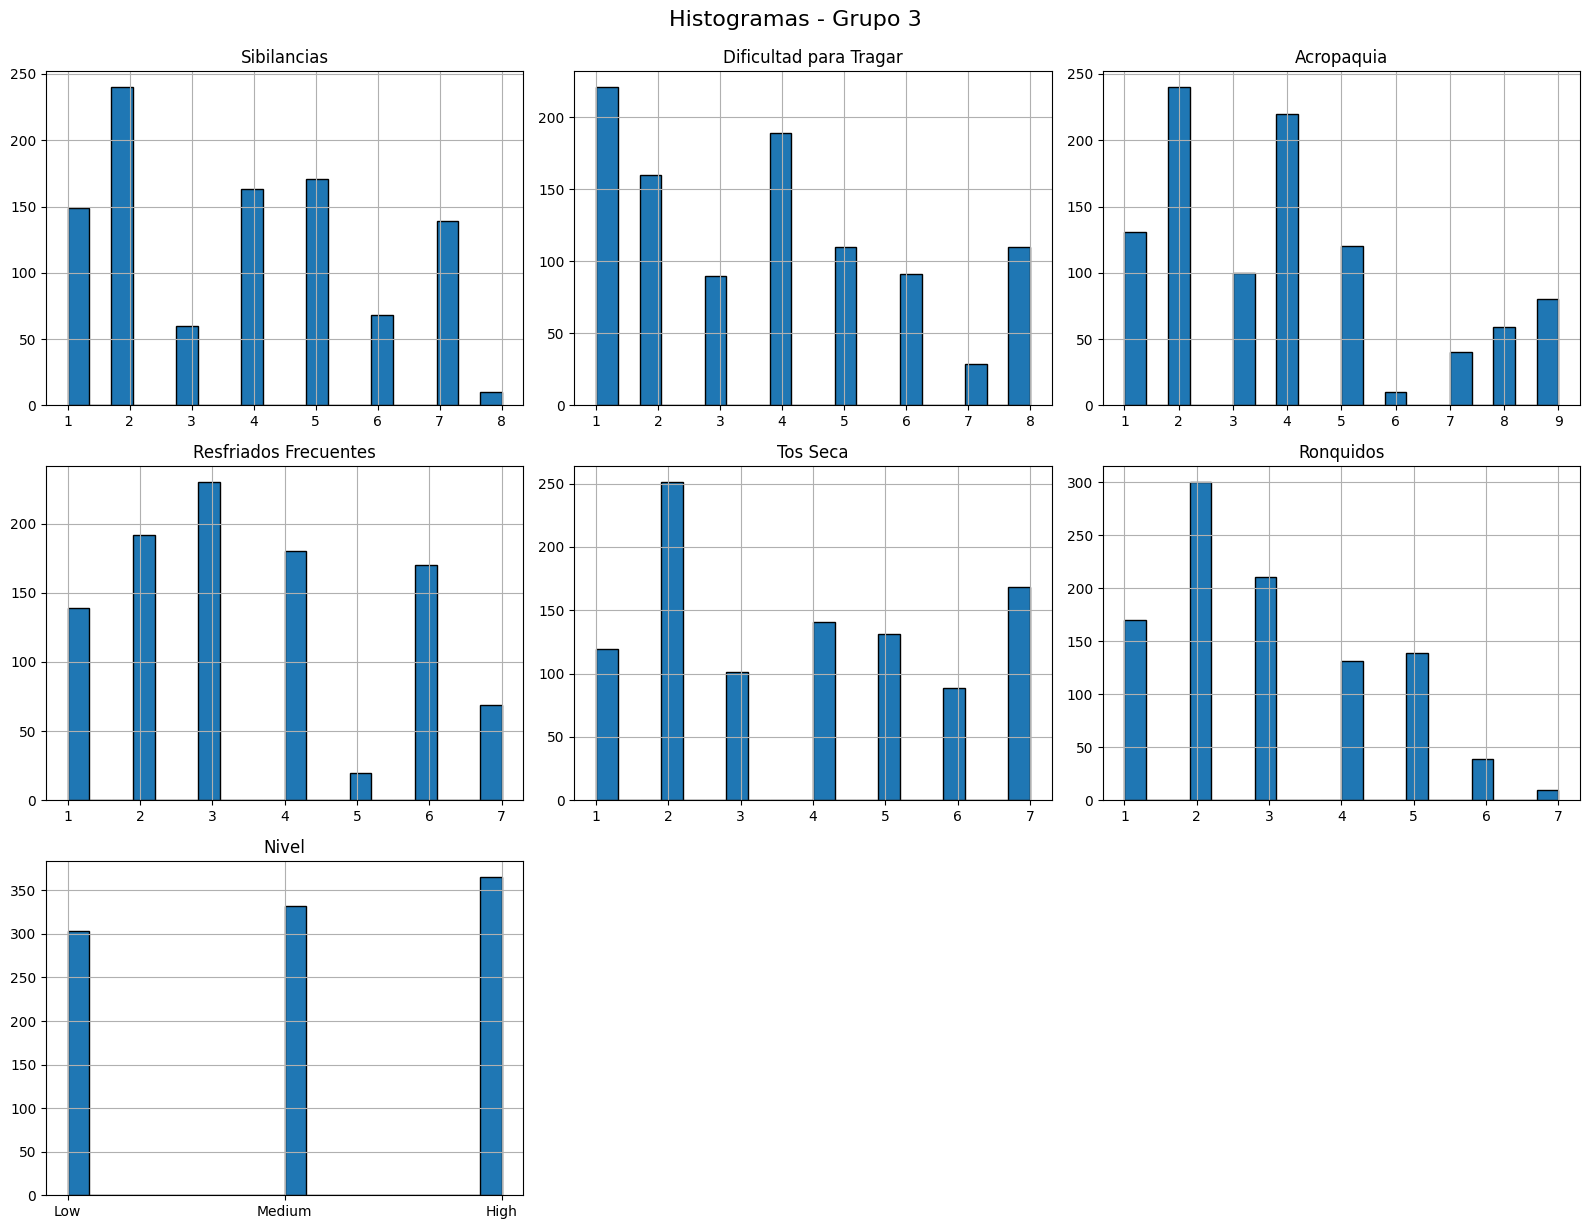

In [36]:
# Dividir las columnas en grupos (por ejemplo, 8 columnas por grupo)
columnas = df_es.columns.tolist()
grupos = [columnas[i:i+9] for i in range(0, len(columnas), 9)]  # Dividir en grupos de 8 columnas

# Crear histogramas para cada grupo
for i, grupo in enumerate(grupos):
    plt.figure(figsize=(16, 12))  # Ajustar el tamaño de la figura
    for j, col in enumerate(grupo):
        plt.subplot(3, 3, j + 1)  # Crear una cuadrícula de subgráficos (3x3 en este caso)
        df_es[col].hist(bins=20, edgecolor='black')  # Histograma de la columna
        plt.title(col)  # Título con el nombre de la columna
        plt.tight_layout()  # Ajustar el espaciado entre subgráficos
    plt.suptitle(f"Histogramas - Grupo {i+1}", y=1.02, fontsize=16)  # Título del grupo
    plt.show()

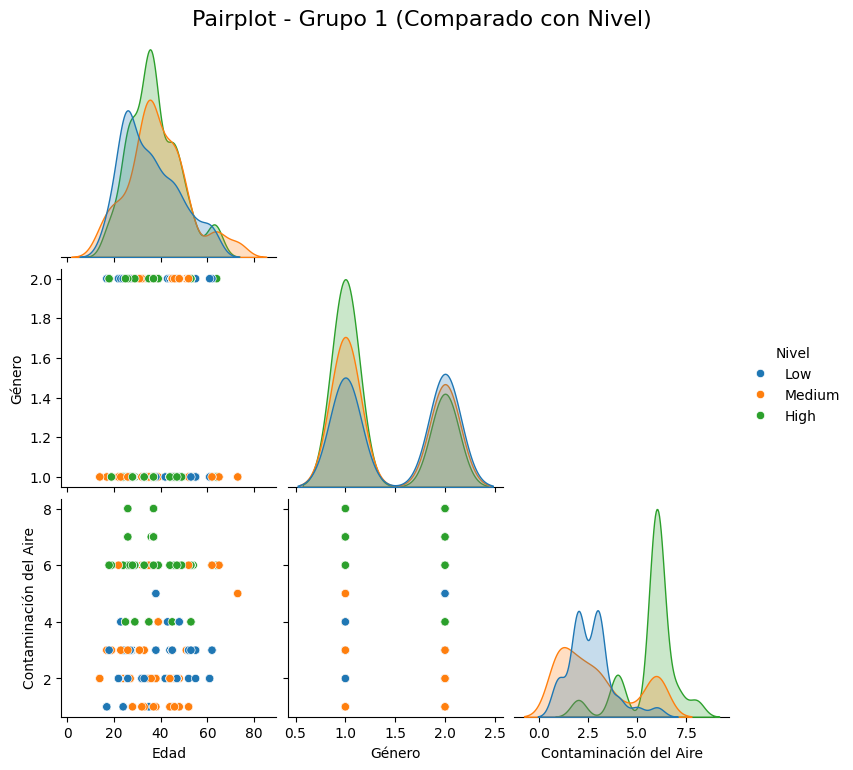

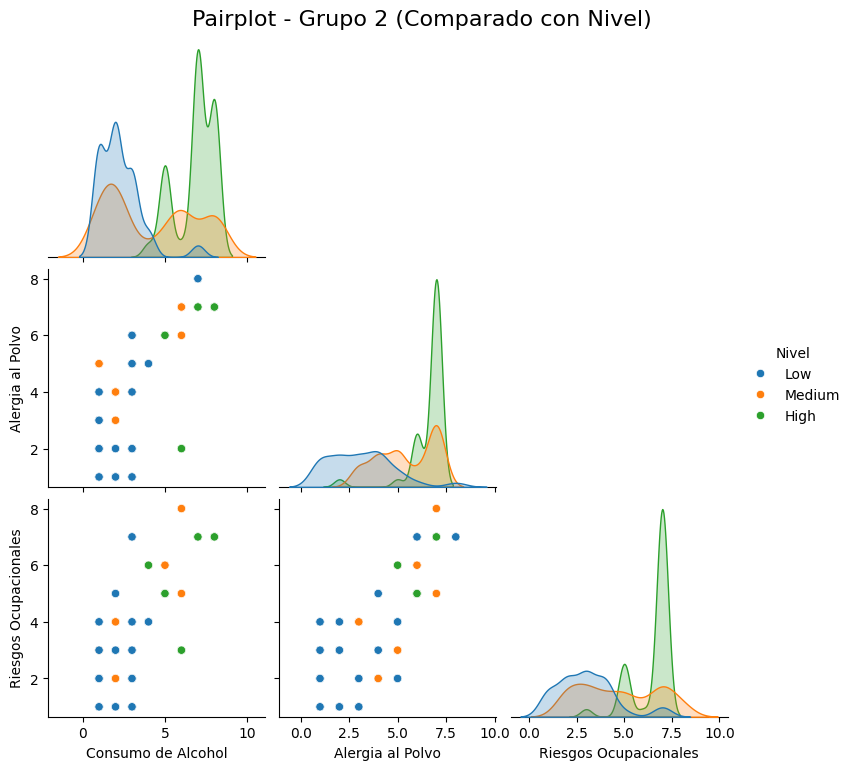

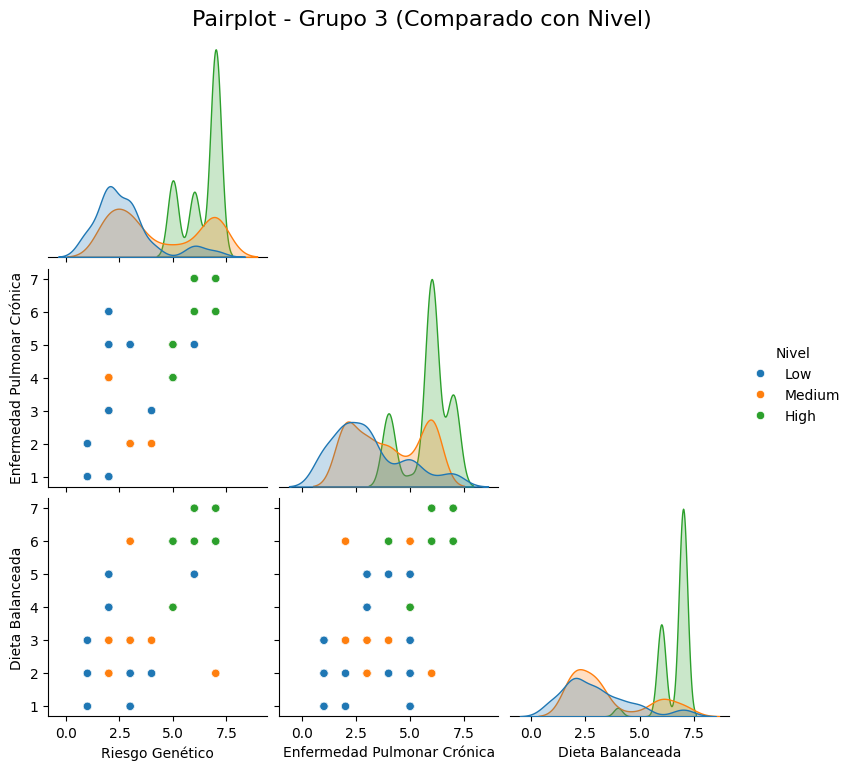

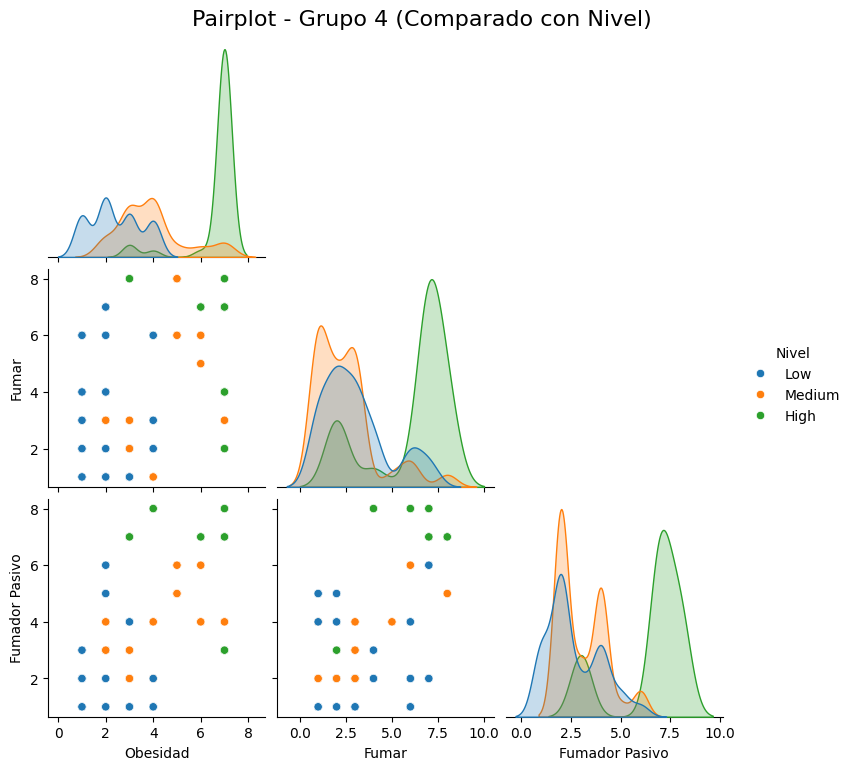

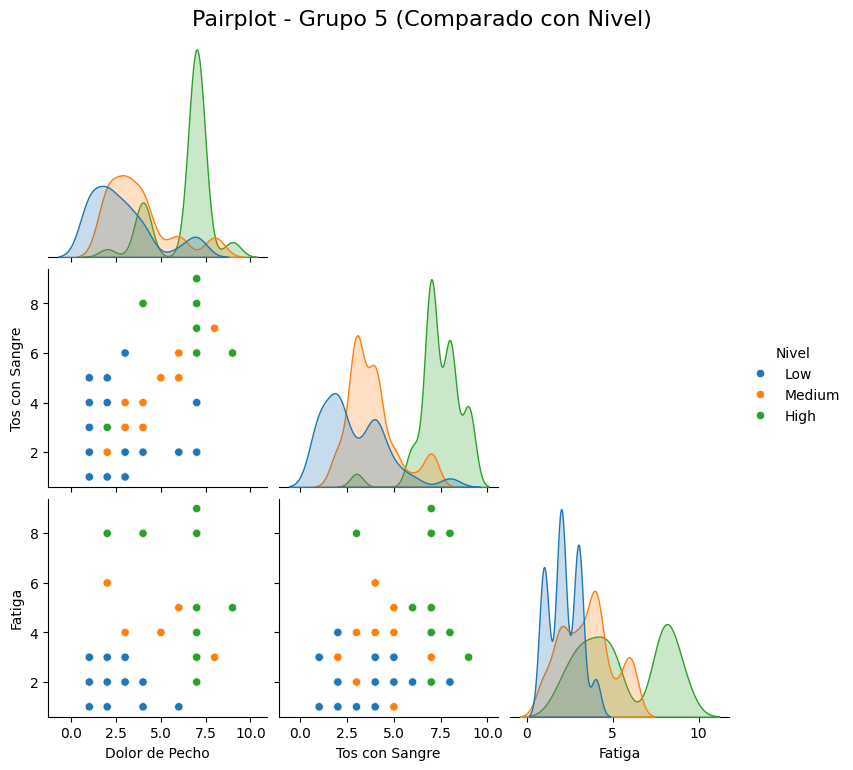

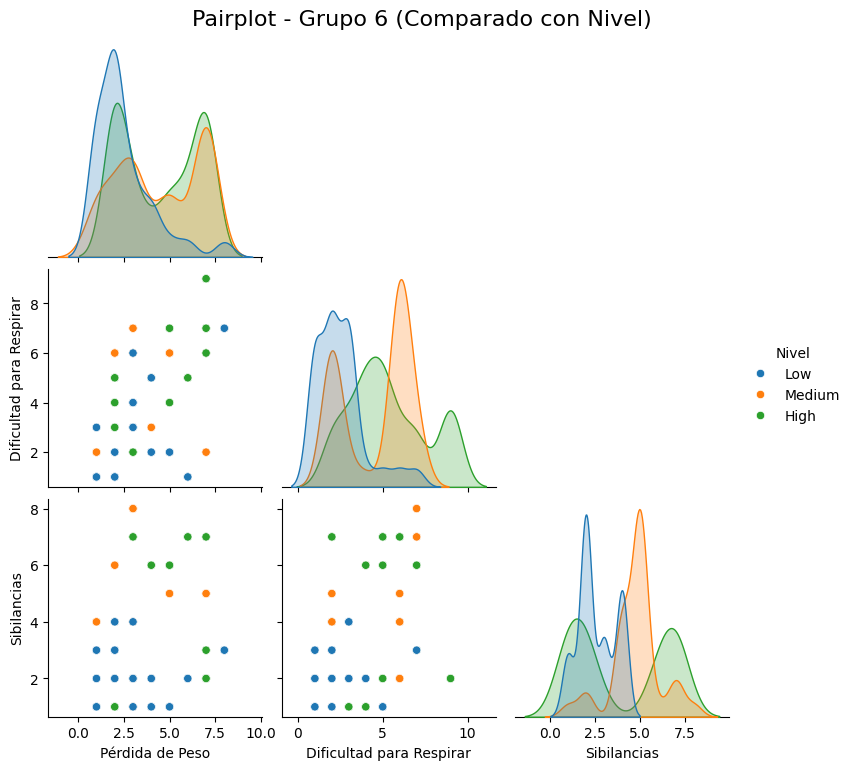

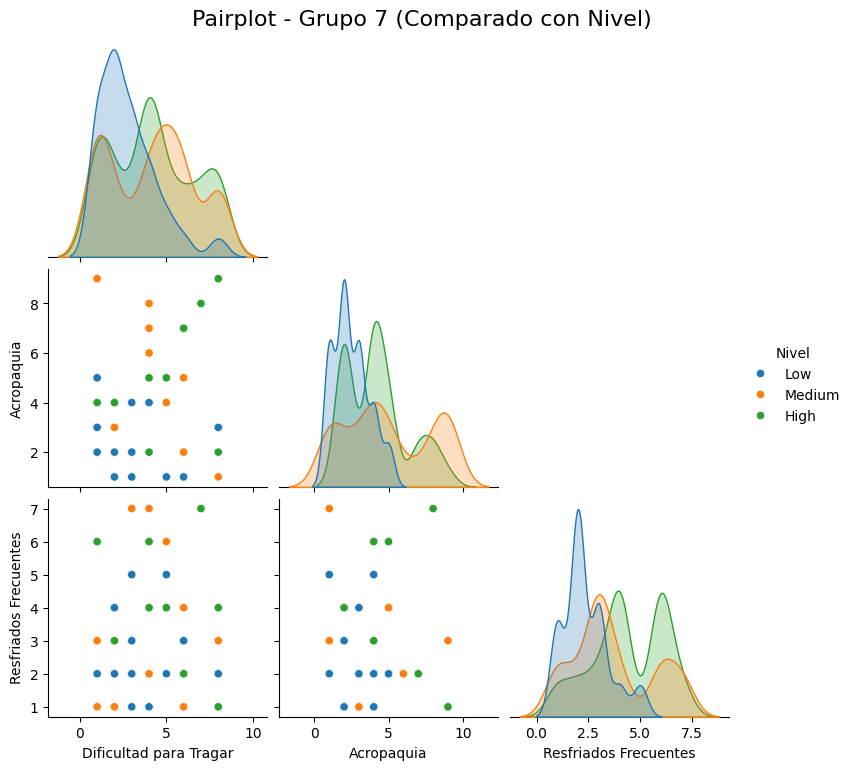

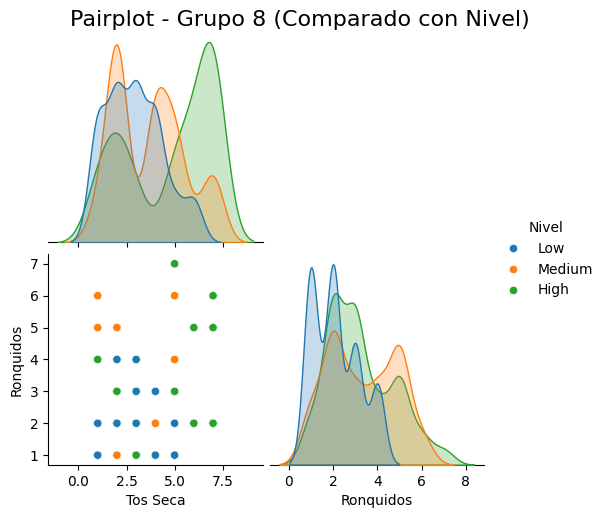

In [41]:
# Dividir las columnas numéricas en grupos
columnas = df_es.select_dtypes(include=['int64', 'float64']).columns.tolist()  # Seleccionar solo columnas numéricas
grupos = [columnas[i:i+3] for i in range(0, len(columnas), 3)]  # Dividir en grupos de 5 columnas

# Añadir la columna objetivo 'Nivel' a cada grupo
for i, grupo in enumerate(grupos):
    grupo_con_nivel = grupo + ['Nivel']  # Añadir la columna 'Nivel' al grupo
    sns.pairplot(df_es[grupo_con_nivel], diag_kind="kde", corner=True, hue="Nivel")  # Comparar con 'Nivel'
    plt.suptitle(f"Pairplot - Grupo {i+1} (Comparado con Nivel)", y=1.02, fontsize=16)
    plt.show()

In [46]:
df_lung = pd.read_csv(r'C:\BOOTCAMP_DATA_SCIENCE\Proyecto ML_CancerPredictionModel\ML_Cancer_Prediction_Models\src\data_sample\lung_cancer_prediction_dataset.csv')

df_lung.set_index('ID', inplace=True)

df_lung.head()

,Country,Population_Size,Age,Gender,Smoker,Years_of_Smoking,Cigarettes_per_Day,Passive_Smoker,Family_History,Lung_Cancer_Diagnosis,Cancer_Stage,Survival_Years,Adenocarcinoma_Type,Air_Pollution_Exposure,Occupational_Exposure,Indoor_Pollution,Healthcare_Access,Early_Detection,Treatment_Type,Developed_or_Developing,Annual_Lung_Cancer_Deaths,Lung_Cancer_Prevalence_Rate,Mortality_Rate
ID,,,,,,,,,,,,,,,,,,,,,,,
0,China,1400,80,Male,Yes,30,29,No,No,No,NaN,0,Yes,Low,Yes,No,Poor,No,NaN,Developing,690000,2.44,0.0
1,Iran,84,53,Male,No,0,0,Yes,No,No,NaN,0,Yes,Low,Yes,No,Poor,No,NaN,Developing,27000,2.10,0.0
2,Mexico,128,47,Male,Yes,12,6,Yes,No,No,NaN,0,Yes,Medium,No,No,Poor,Yes,NaN,Developing,28000,1.11,0.0
3,Indonesia,273,39,Female,No,0,0,No,Yes,No,NaN,0,Yes,Low,No,No,Poor,No,NaN,Developing,40000,0.75,0.0
4,South Africa,59,44,Female,No,0,0,Yes,No,No,NaN,0,Yes,Medium,Yes,No,Poor,No,NaN,Developing,15000,2.44,0.0


In [60]:
# Diccionario con las traducciones de las columnas
traducciones = {
    "Country": "País",
    "Population_Size": "Tamaño_Población",
    "Age": "Edad",
    "Gender": "Género",
    "Smoker": "Fumador",
    "Years_of_Smoking": "Años_Fumando",
    "Cigarettes_per_Day": "Cigarrillos_por_Día",
    "Passive_Smoker": "Fumador_Pasivo",
    "Family_History": "Historial_Familiar",
    "Lung_Cancer_Diagnosis": "Diagnóstico_Cáncer_Pulmonar",
    "Cancer_Stage": "Etapa_Cáncer",
    "Survival_Years": "Años_Supervivencia",
    "Adenocarcinoma_Type": "Tipo_Adenocarcinoma",
    "Air_Pollution_Exposure": "Exposición_Contaminación_Aire",
    "Occupational_Exposure": "Exposición_Ocupacional",
    "Indoor_Pollution": "Contaminación_Interior",
    "Healthcare_Access": "Acceso_Salud",
    "Early_Detection": "Detección_Temprana",
    "Treatment_Type": "Tipo_Tratamiento",
    "Developed_or_Developing": "Desarrollado_o_En_Desarrollo",
    "Annual_Lung_Cancer_Deaths": "Muertes_Anuales_Cáncer_Pulmonar",
    "Lung_Cancer_Prevalence_Rate": "Tasa_Prevalencia_Cáncer_Pulmonar",
    "Mortality_Rate": "Tasa_Mortalidad"
}

# Renombrar las columnas
df_lung.rename(columns=traducciones, inplace=True)

# Verificar los nuevos nombres de las columnas
df_lung.sample(10)

,País,Tamaño_Población,Edad,Género,Fumador,Años_Fumando,Cigarrillos_por_Día,Fumador_Pasivo,Historial_Familiar,Diagnóstico_Cáncer_Pulmonar,Años_Supervivencia,Tipo_Adenocarcinoma,Exposición_Contaminación_Aire,Exposición_Ocupacional,Contaminación_Interior,Acceso_Salud,Detección_Temprana,Desarrollado_o_En_Desarrollo,Muertes_Anuales_Cáncer_Pulmonar,Tasa_Prevalencia_Cáncer_Pulmonar,Tasa_Mortalidad
ID,,,,,,,,,,,,,,,,,,,,,
203871,Italy,60,82,Male,Yes,18,13,No,No,No,0,Yes,Medium,No,Yes,Poor,No,Developed,31000,0.65,0.00
140330,Vietnam,97,76,Male,No,0,0,No,No,Yes,4,No,Medium,No,No,Poor,No,Developing,22000,1.07,60.36
112942,DR Congo,95,49,Male,No,0,0,No,No,No,0,No,High,No,No,Poor,No,Developing,17000,1.33,0.00
121639,Nigeria,206,21,Female,No,0,0,No,No,No,0,No,Low,No,No,Poor,No,Developing,20000,1.87,0.00
137439,UK,67,68,Male,Yes,16,12,No,No,No,0,No,Medium,No,No,Good,Yes,Developed,35000,1.86,0.00
140030,Japan,125,55,Male,Yes,36,13,No,No,No,0,Yes,Low,Yes,No,Good,Yes,Developed,75000,1.46,0.00
173044,Ethiopia,120,35,Female,Yes,25,12,No,No,No,0,Yes,Medium,No,No,Poor,No,Developing,18000,0.69,0.00
33710,UK,67,63,Female,No,0,0,No,No,No,0,No,Medium,Yes,No,Good,Yes,Developed,35000,2.37,0.00
169300,Russia,145,72,Female,No,0,0,Yes,No,No,0,Yes,High,No,No,Poor,No,Developing,60000,2.15,0.00


In [49]:
df_lung.info()

<class 'pandas.core.frame.DataFrame'>
Index: 220632 entries, 0 to 220631
Data columns (total 23 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   País                              220632 non-null  object 
 1   Tamaño_Población                  220632 non-null  int64  
 2   Edad                              220632 non-null  int64  
 3   Género                            220632 non-null  object 
 4   Fumador                           220632 non-null  object 
 5   Años_Fumando                      220632 non-null  int64  
 6   Cigarrillos_por_Día               220632 non-null  int64  
 7   Fumador_Pasivo                    220632 non-null  object 
 8   Historial_Familiar                220632 non-null  object 
 9   Diagnóstico_Cáncer_Pulmonar       220632 non-null  object 
 10  Etapa_Cáncer                      8961 non-null    object 
 11  Años_Supervivencia                220632 non-null  int64 

In [50]:
def describe_df(df_lung):
    # Creamons un diccionario para almacenar la información
    data = {
        'DATA_TYPE': df_lung.dtypes,
        'MISSINGS(%)': df_lung.isnull().mean() * 100,
        'UNIQUE_VALUES': df_lung.nunique(),
        'CARDIN(%)': df_lung.nunique() / len(df) * 100
    }
    # Creamos un nuevo DataFrame con la información recopilada, usamos 'transpose' para cambiar 
    # las filas por columnas.
    pacientes_df_lung = pd.DataFrame(data).transpose()
    
    return pacientes_df_lung

pacientes_df_lung = describe_df(df_lung)
pacientes_df_lung

,País,Tamaño_Población,Edad,Género,Fumador,Años_Fumando,Cigarrillos_por_Día,Fumador_Pasivo,Historial_Familiar,Diagnóstico_Cáncer_Pulmonar,Etapa_Cáncer,Años_Supervivencia,Tipo_Adenocarcinoma,Exposición_Contaminación_Aire,Exposición_Ocupacional,Contaminación_Interior,Acceso_Salud,Detección_Temprana,Tipo_Tratamiento,Desarrollado_o_En_Desarrollo,Muertes_Anuales_Cáncer_Pulmonar,Tasa_Prevalencia_Cáncer_Pulmonar,Tasa_Mortalidad
DATA_TYPE,object,int64,int64,object,object,int64,int64,object,object,object,object,int64,object,object,object,object,object,object,object,object,int64,float64,float64
MISSINGS(%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,95.938486,0.0,0.0,0.0,0.0,0.0,0.0,0.0,96.979586,0.0,0.0,0.0,0.0
UNIQUE_VALUES,25,25,66,2,2,41,27,2,2,2,4,11,2,3,2,2,2,2,3,2,8079,201,2849
CARDIN(%),2.5,2.5,6.6,0.2,0.2,4.1,2.7,0.2,0.2,0.2,0.4,1.1,0.2,0.3,0.2,0.2,0.2,0.2,0.3,0.2,807.9,20.1,284.9


In [53]:
df_lung.info()

<class 'pandas.core.frame.DataFrame'>
Index: 220632 entries, 0 to 220631
Data columns (total 21 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   País                              220632 non-null  object 
 1   Tamaño_Población                  220632 non-null  int64  
 2   Edad                              220632 non-null  int64  
 3   Género                            220632 non-null  object 
 4   Fumador                           220632 non-null  object 
 5   Años_Fumando                      220632 non-null  int64  
 6   Cigarrillos_por_Día               220632 non-null  int64  
 7   Fumador_Pasivo                    220632 non-null  object 
 8   Historial_Familiar                220632 non-null  object 
 9   Diagnóstico_Cáncer_Pulmonar       220632 non-null  object 
 10  Años_Supervivencia                220632 non-null  int64  
 11  Tipo_Adenocarcinoma               220632 non-null  object

In [54]:
def clasificar_variables(df_lung, umbral_categoria=10, umbral_discreta=20):

    clasificacion = []

    for col in df_lung.columns:
        unique_values = df_lung[col].nunique()
        dtype = df_lung[col].dtype

        # Clasificación de las variables
        if dtype == 'object' or unique_values <= umbral_categoria:
            tipo_variable = "Categórica"
        elif dtype in ['int64', 'float64'] and unique_values <= umbral_discreta:
            tipo_variable = "Discreta"
        elif dtype in ['int64', 'float64']:
            tipo_variable = "Continua"
        else:
            tipo_variable = "Desconocido"

        # Añadir la información al resultado
        clasificacion.append({"Columna": col, "Tipo de Variable": tipo_variable, "Tipo de Dato": dtype})
    
    return pd.DataFrame(clasificacion)

# Aplicar la función
resultado = clasificar_variables(df_lung)
resultado

,Columna,Tipo de Variable,Tipo de Dato
0,País,Categórica,object
1,Tamaño_Población,Continua,int64
2,Edad,Continua,int64
3,Género,Categórica,object
4,Fumador,Categórica,object
5,Años_Fumando,Continua,int64
6,Cigarrillos_por_Día,Continua,int64
7,Fumador_Pasivo,Categórica,object
8,Historial_Familiar,Categórica,object
9,Diagnóstico_Cáncer_Pulmonar,Categórica,object


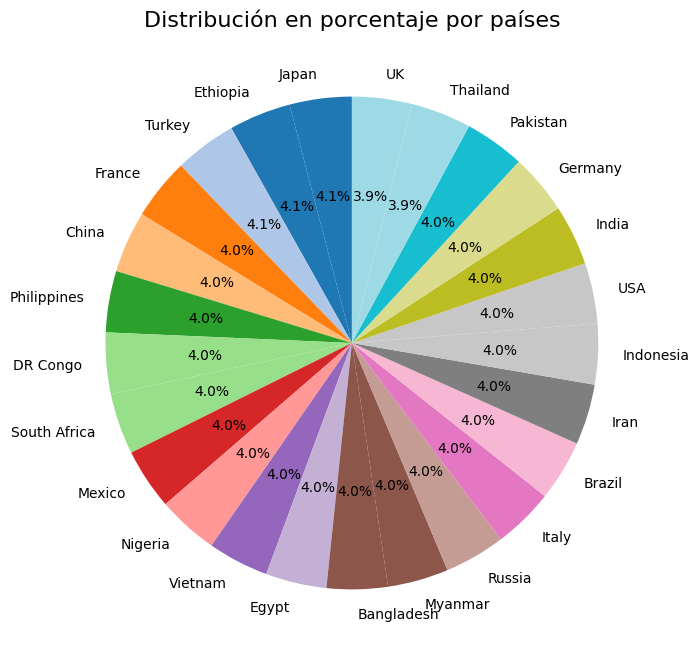

In [73]:
# Contar la cantidad de registros por país
distribucion_paises = df_lung['País'].value_counts()

# Crear el gráfico de pastel
plt.figure(figsize=(10, 8))
distribucion_paises.plot.pie(autopct='%1.1f%%', startangle=90, cmap='tab20', legend=False)
plt.title("Distribución en porcentaje por países", fontsize=16)
plt.ylabel("")  # Eliminar la etiqueta del eje Y
plt.show()

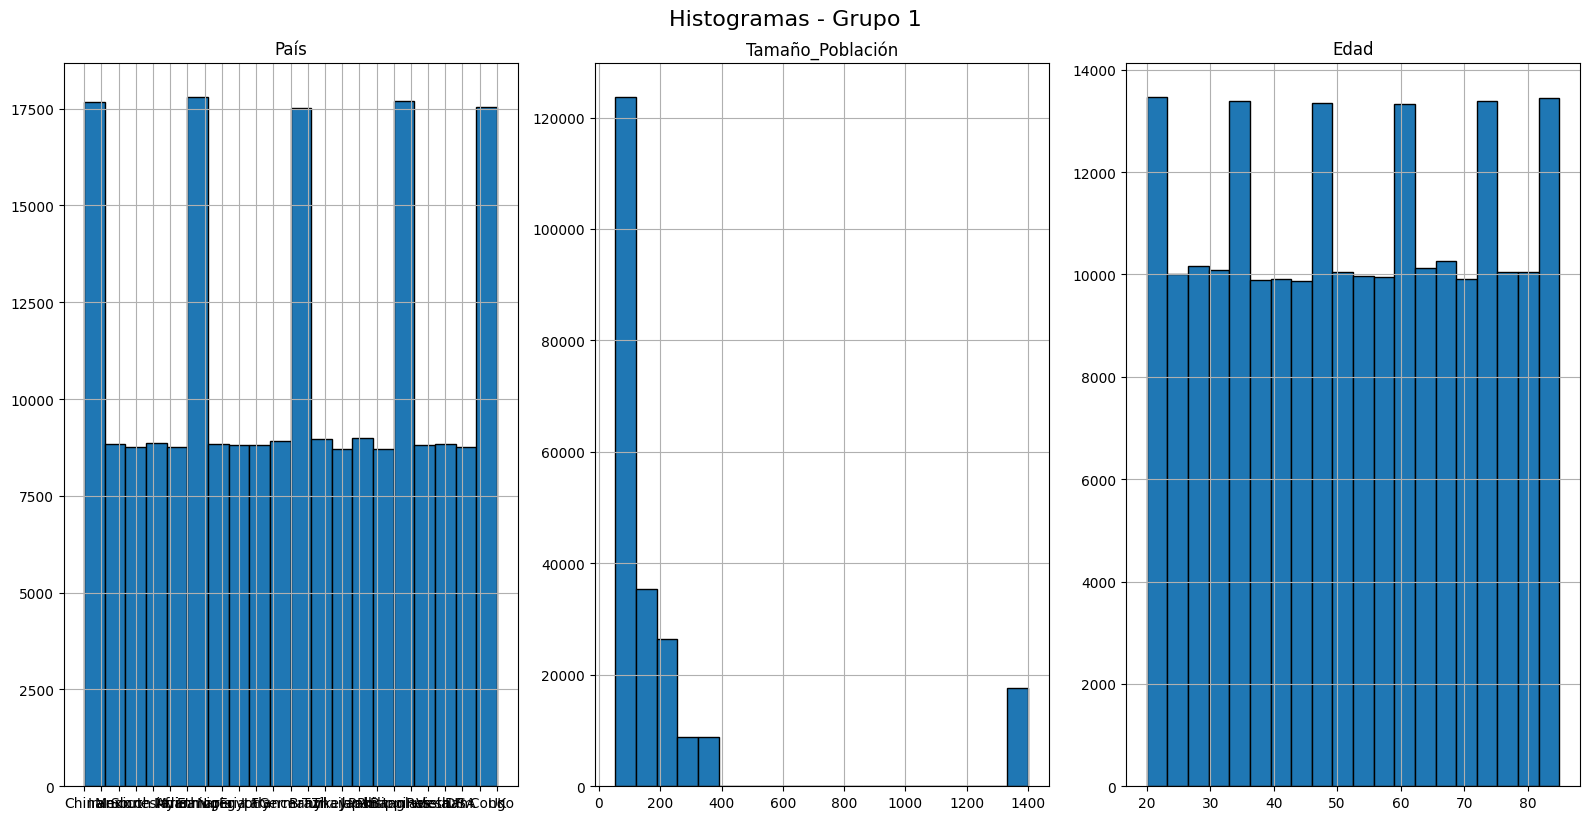

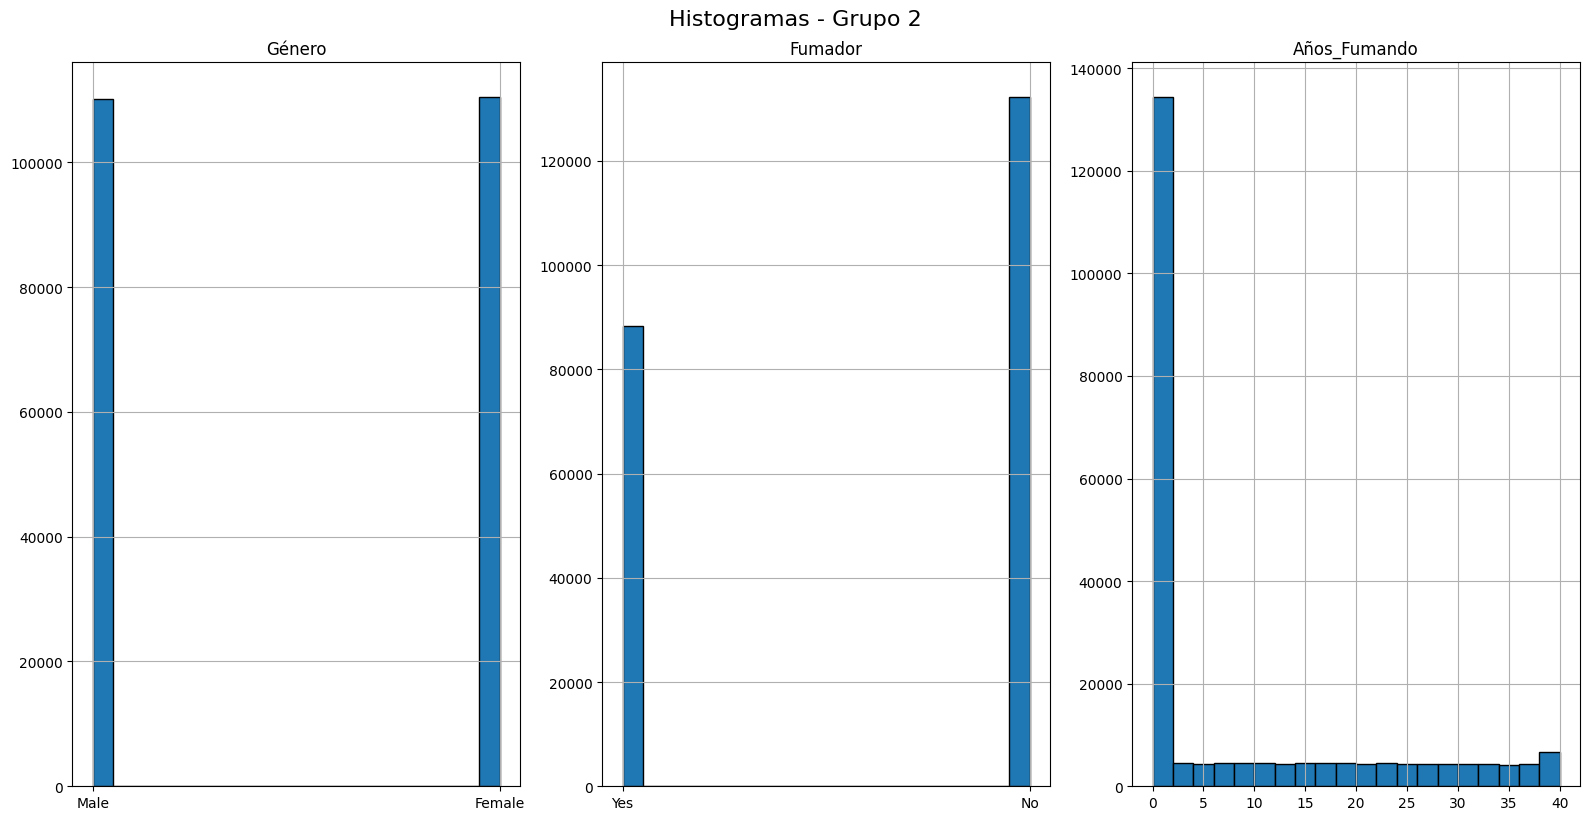

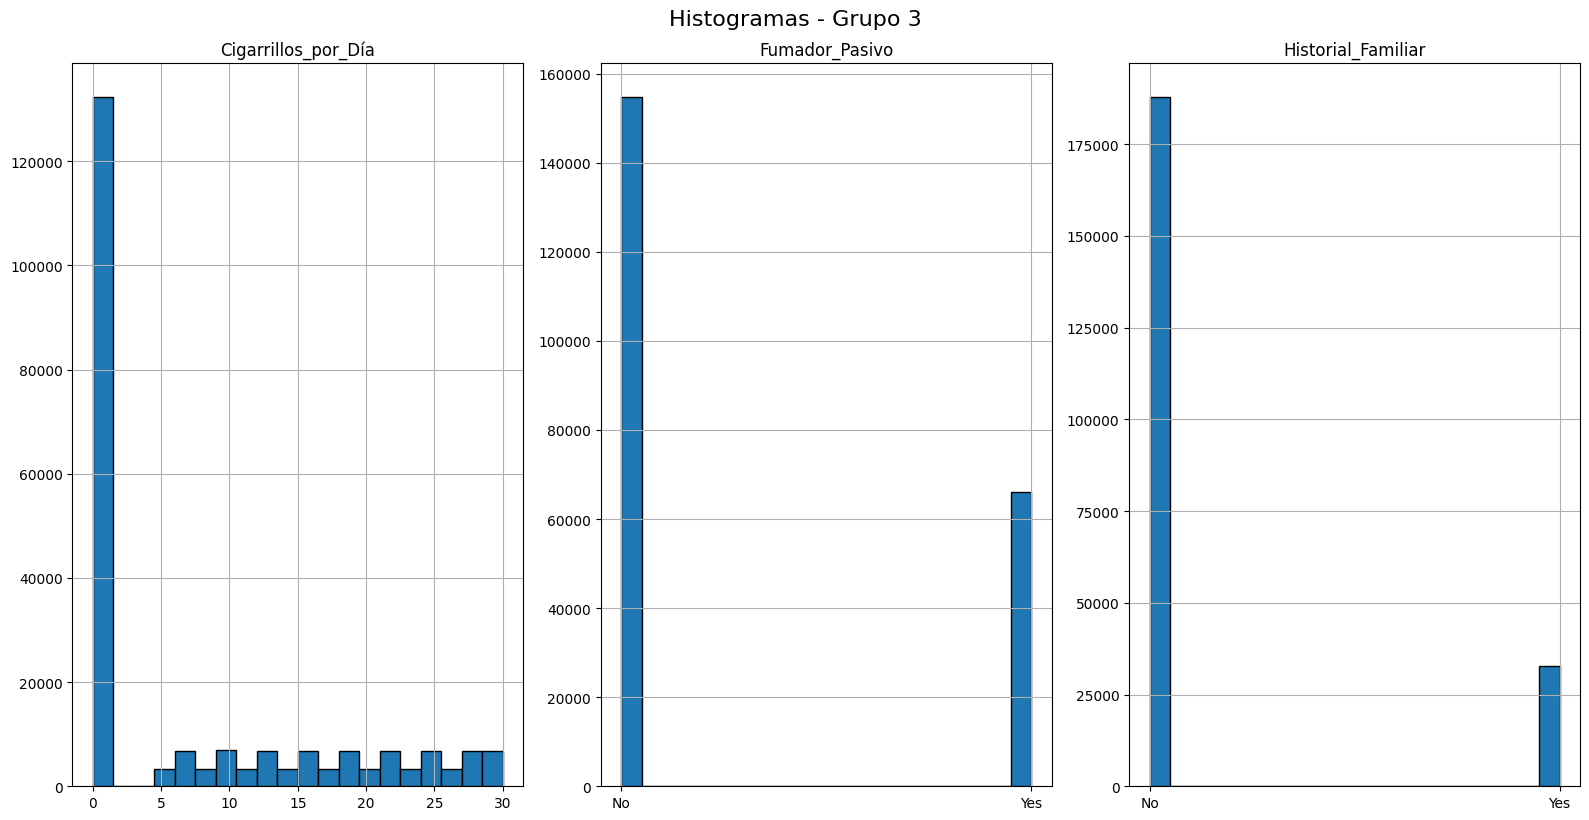

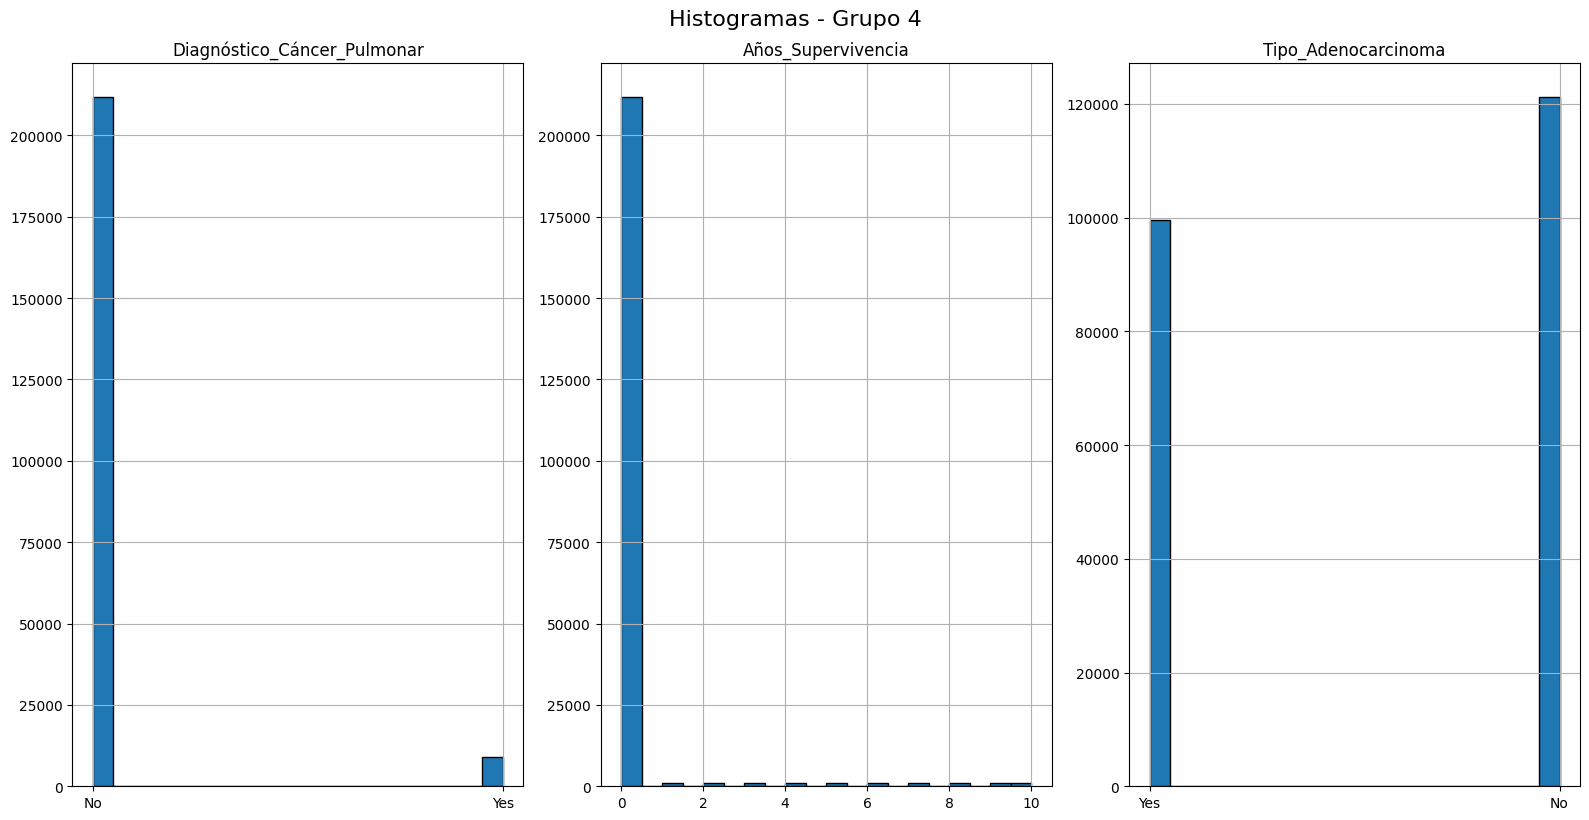

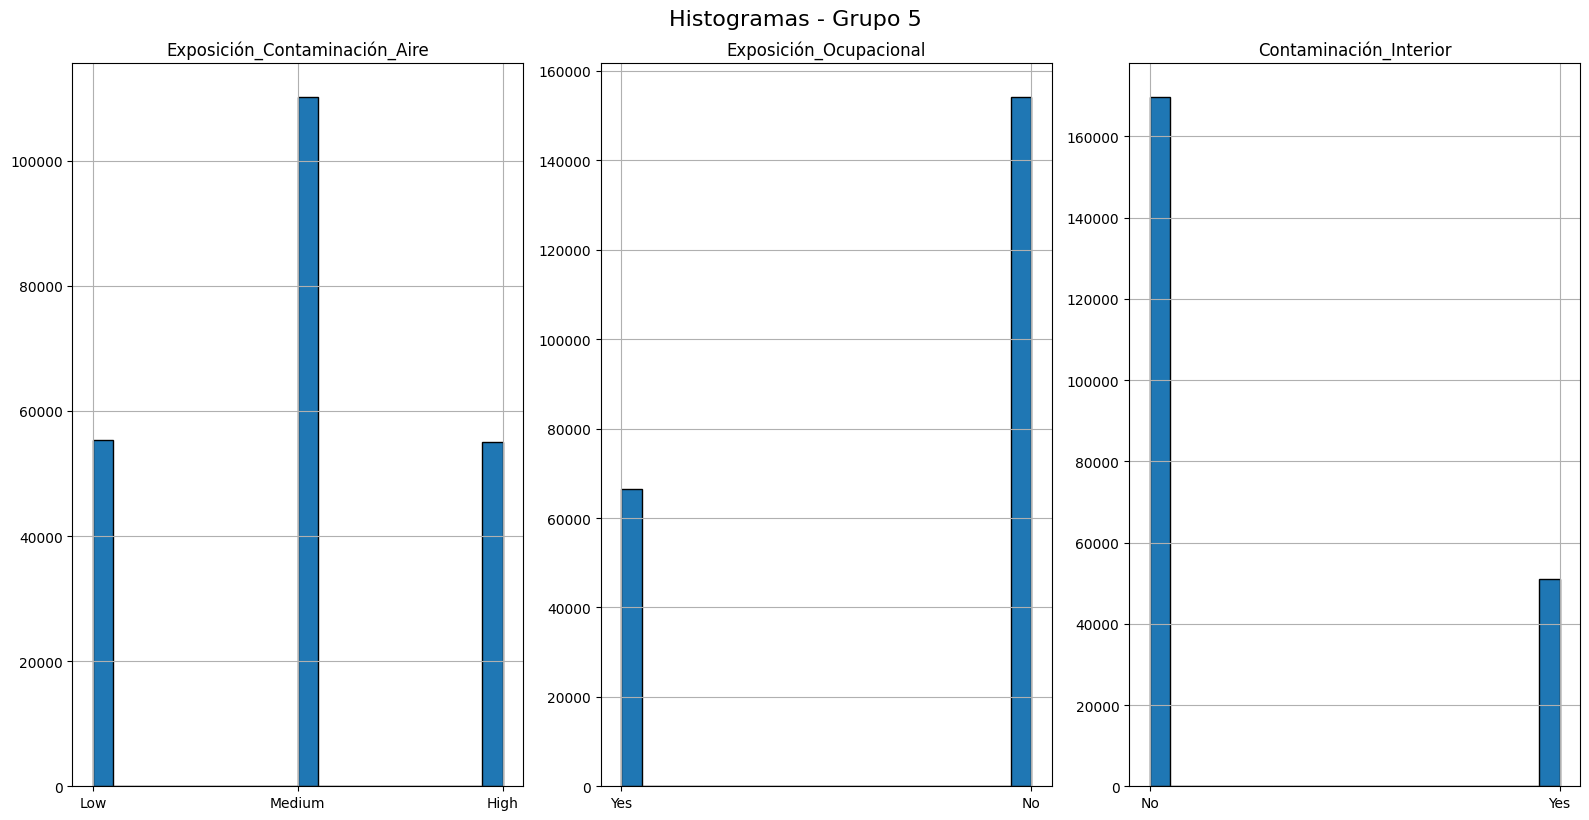

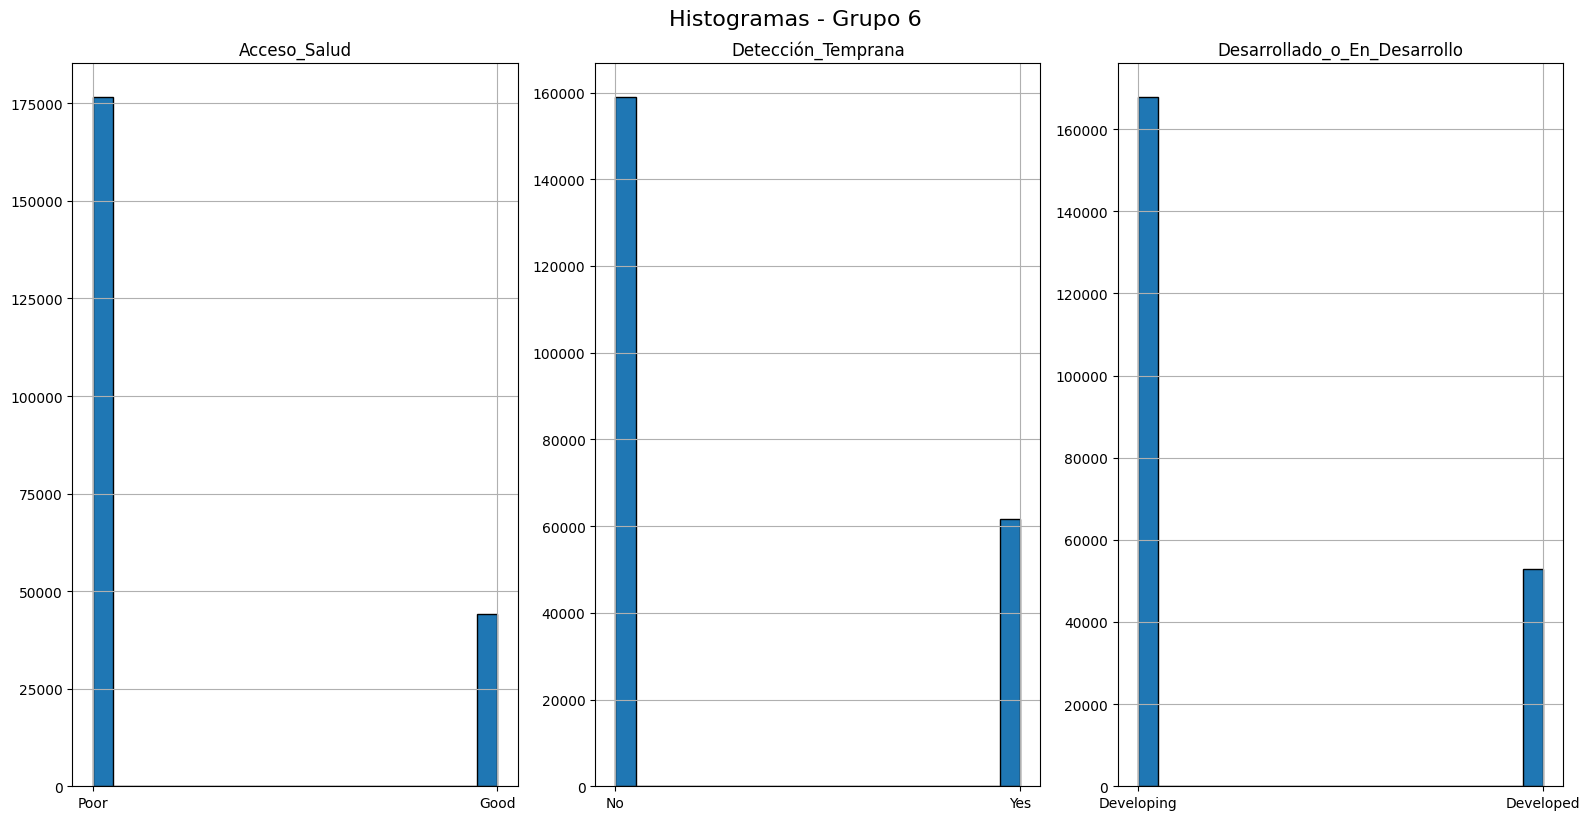

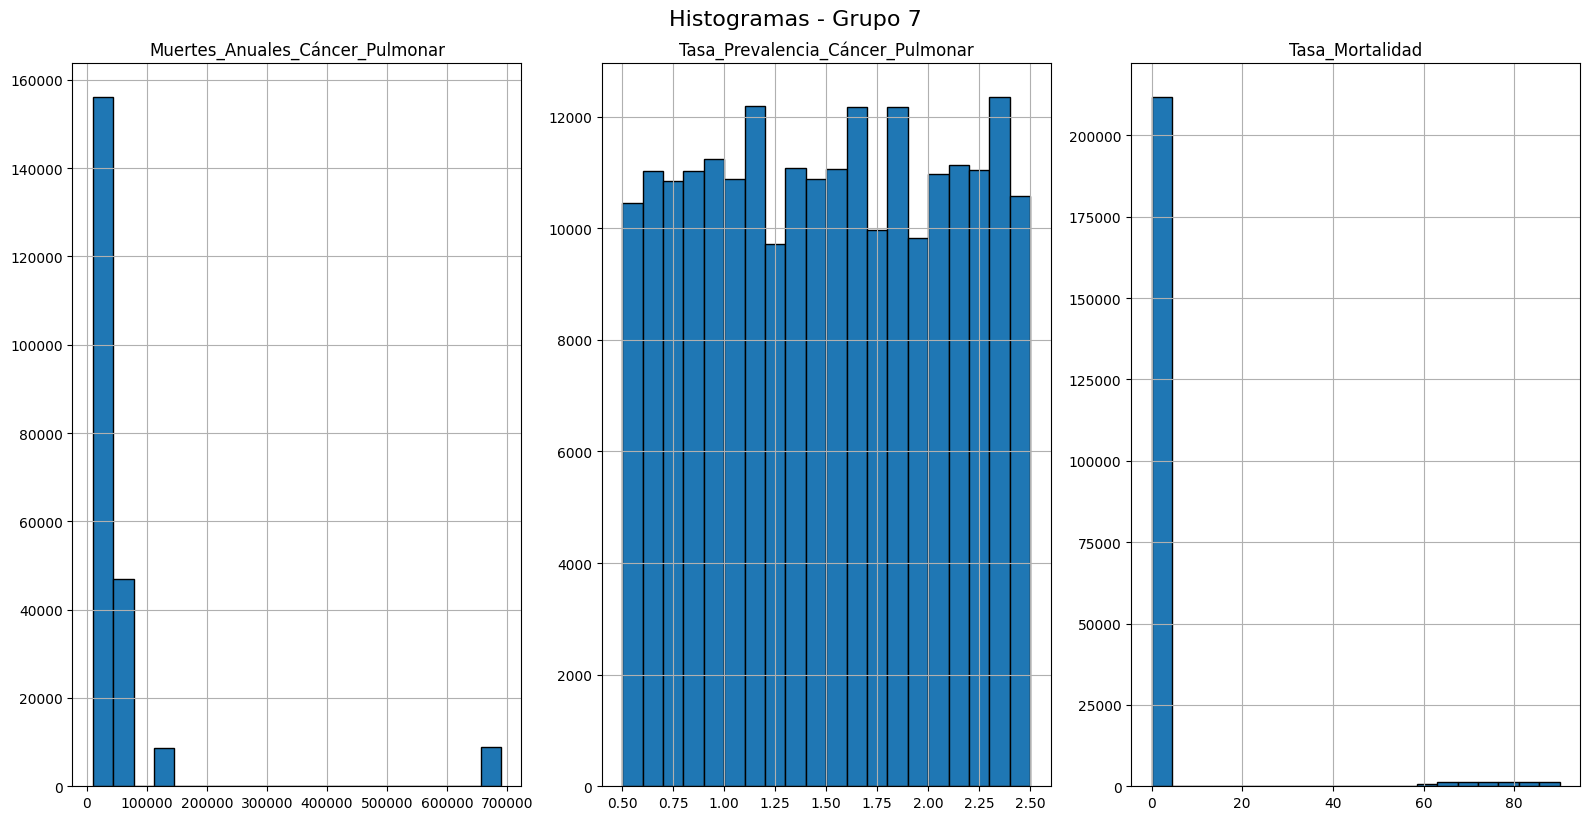

In [63]:
# Seleccionar todas las columnas del DataFrame
columnas = df_lung.columns.tolist()

# Crear histogramas para todas las columnas, con un máximo de 3 gráficos por imagen
for i in range(0, len(columnas), 3):  # Iterar en pasos de 3 columnas
    grupo = columnas[i:i+3]  # Seleccionar un grupo de 3 columnas
    plt.figure(figsize=(16, 8))  # Ajustar el tamaño de la figura
    for j, col in enumerate(grupo):
        plt.subplot(1, 3, j + 1)  # Crear una cuadrícula de subgráficos (1 fila, 3 columnas)
        df_lung[col].hist(bins=20, edgecolor='black')  # Histograma de la columna
        plt.title(col)  # Título con el nombre de la columna
        plt.tight_layout()  # Ajustar el espaciado entre subgráficos
    plt.suptitle(f"Histogramas - Grupo {i//3 + 1}", y=1.02, fontsize=16)  # Título del grupo
    plt.show()

In [3]:
df_thyroid = pd.read_csv(r'C:\BOOTCAMP_DATA_SCIENCE\Proyecto ML_CancerPredictionModel\ML_Cancer_Prediction_Models\src\data_sample\thyroid_cancer_risk_data.csv')

df_thyroid.set_index('Patient_ID', inplace=True)

df_thyroid.head()

,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
Patient_ID,,,,,,,,,,,,,,,,
1,66,Male,Russia,Caucasian,No,Yes,No,No,No,No,9.37,1.67,6.16,1.08,Low,Benign
2,29,Male,Germany,Hispanic,No,Yes,No,No,No,No,1.83,1.73,10.54,4.05,Low,Benign
3,86,Male,Nigeria,Caucasian,No,No,No,No,No,No,6.26,2.59,10.57,4.61,Low,Benign
4,75,Female,India,Asian,No,No,No,No,No,No,4.10,2.62,11.04,2.46,Medium,Benign
5,35,Female,Germany,African,Yes,Yes,No,No,No,No,9.10,2.11,10.71,2.11,High,Benign


In [71]:
df_thyroid.info()

<class 'pandas.core.frame.DataFrame'>
Index: 212691 entries, 1 to 212691
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Age                  212691 non-null  int64  
 1   Gender               212691 non-null  object 
 2   Country              212691 non-null  object 
 3   Ethnicity            212691 non-null  object 
 4   Family_History       212691 non-null  object 
 5   Radiation_Exposure   212691 non-null  object 
 6   Iodine_Deficiency    212691 non-null  object 
 7   Smoking              212691 non-null  object 
 8   Obesity              212691 non-null  object 
 9   Diabetes             212691 non-null  object 
 10  TSH_Level            212691 non-null  float64
 11  T3_Level             212691 non-null  float64
 12  T4_Level             212691 non-null  float64
 13  Nodule_Size          212691 non-null  float64
 14  Thyroid_Cancer_Risk  212691 non-null  object 
 15  Diagnosis            2


1. Nivel de TSH (Hormona Estimulante de la Tiroides)
¿Qué es?

La TSH (Thyroid Stimulating Hormone) es una hormona producida por la glándula pituitaria (hipófisis) que regula el funcionamiento de la glándula tiroides.
Su función principal es estimular la tiroides para que produzca las hormonas tiroideas T3 y T4.
¿Qué indica?

Altos niveles de TSH:
Indican que la tiroides no está produciendo suficientes hormonas (hipotiroidismo).
La glándula pituitaria aumenta la producción de TSH para intentar compensar.
Bajos niveles de TSH:
Indican que la tiroides está produciendo demasiadas hormonas (hipertiroidismo).
La glándula pituitaria reduce la producción de TSH.
2. Nivel de T3 (Triyodotironina)
¿Qué es?

La T3 (Triyodotironina) es una de las principales hormonas producidas por la glándula tiroides.
Es responsable de regular el metabolismo, la temperatura corporal, el ritmo cardíaco y otros procesos fisiológicos.
¿Qué indica?

Altos niveles de T3:
Indican hipertiroidismo (la tiroides está hiperactiva).
Puede causar síntomas como pérdida de peso, nerviosismo, sudoración excesiva y ritmo cardíaco acelerado.
Bajos niveles de T3:
Indican hipotiroidismo (la tiroides está hipoactiva).
Puede causar síntomas como fatiga, aumento de peso, piel seca y sensibilidad al frío.
3. Nivel de T4 (Tiroxina)
¿Qué es?

La T4 (Tiroxina) es otra de las principales hormonas producidas por la glándula tiroides.
Es la forma inactiva de la hormona tiroidea, que se convierte en T3 (la forma activa) en los tejidos del cuerpo.
¿Qué indica?

Altos niveles de T4:
Indican hipertiroidismo.
Los síntomas son similares a los de altos niveles de T3.
Bajos niveles de T4:
Indican hipotiroidismo.
Los síntomas son similares a los de bajos niveles de T3.
Relación entre TSH, T3 y T4
TSH regula la producción de T3 y T4:
Si los niveles de T3 y T4 son bajos, la glándula pituitaria aumenta la producción de TSH para estimular la tiroides.
Si los niveles de T3 y T4 son altos, la glándula pituitaria reduce la producción de TSH.
T3 y T4 trabajan juntas para regular el metabolismo del cuerpo.
Interpretación clínica
Hipotiroidismo:
TSH alta, T3 baja, T4 baja.
La tiroides no produce suficientes hormonas, y la pituitaria intenta compensar aumentando la TSH.
Hipertiroidismo:
TSH baja, T3 alta, T4 alta.
La tiroides produce demasiadas hormonas, y la pituitaria reduce la TSH.
Eutiroidismo (funcionamiento normal):
Niveles normales de TSH, T3 y T4.

In [76]:
# Diccionario con las traducciones de las columnas
traducciones = {
    "Age": "Edad",
    "Gender": "Género",
    "Country": "País",
    "Ethnicity": "Etnicidad",
    "Family_History": "Historial_Familiar",
    "Radiation_Exposure": "Exposición_a_Radiación",
    "Iodine_Deficiency": "Deficiencia_de_Yodo",
    "Smoking": "Fumar",
    "Obesity": "Obesidad",
    "Diabetes": "Diabetes",
    "TSH_Level": "Nivel_TSH",
    "T3_Level": "Nivel_T3_(Triyodotironina)",
    "T4_Level": "Nivel_T4_(Tiroxina)",
    "Nodule_Size": "Tamaño_del_Nódulo",
    "Thyroid_Cancer_Risk": "Riesgo_de_Cáncer_de_Tiroides",
    "Diagnosis": "Diagnóstico"
}

# Renombrar las columnas
df_thyroid.rename(columns=traducciones, inplace=True)

# Verificar los nuevos nombres de las columnas
df_thyroid.head()

,Edad,Género,País,Etnicidad,Historial_Familiar,Exposición_a_Radiación,Deficiencia_de_Yodo,Fumar,Obesidad,Diabetes,Nivel_de_TSH,Nivel_de_T3,Nivel_de_T4,Tamaño_del_Nódulo,Riesgo_de_Cáncer_de_Tiroides,Diagnóstico
Patient_ID,,,,,,,,,,,,,,,,
1,66,Male,Russia,Caucasian,No,Yes,No,No,No,No,9.37,1.67,6.16,1.08,Low,Benign
2,29,Male,Germany,Hispanic,No,Yes,No,No,No,No,1.83,1.73,10.54,4.05,Low,Benign
3,86,Male,Nigeria,Caucasian,No,No,No,No,No,No,6.26,2.59,10.57,4.61,Low,Benign
4,75,Female,India,Asian,No,No,No,No,No,No,4.10,2.62,11.04,2.46,Medium,Benign
5,35,Female,Germany,African,Yes,Yes,No,No,No,No,9.10,2.11,10.71,2.11,High,Benign


In [77]:
def describe_df(df_thyroid):
    # Creamons un diccionario para almacenar la información
    data = {
        'DATA_TYPE': df_thyroid.dtypes,
        'MISSINGS(%)': df_thyroid.isnull().mean() * 100,
        'UNIQUE_VALUES': df_thyroid.nunique(),
        'CARDIN(%)': df_thyroid.nunique() / len(df) * 100
    }
    # Creamos un nuevo DataFrame con la información recopilada, usamos 'transpose' para cambiar 
    # las filas por columnas.
    pacientes_df_thyroid = pd.DataFrame(data).transpose()
    
    return pacientes_df_thyroid

pacientes_df_thyroid = describe_df(df_thyroid)
pacientes_df_thyroid

,Edad,Género,País,Etnicidad,Historial_Familiar,Exposición_a_Radiación,Deficiencia_de_Yodo,Fumar,Obesidad,Diabetes,Nivel_de_TSH,Nivel_de_T3,Nivel_de_T4,Tamaño_del_Nódulo,Riesgo_de_Cáncer_de_Tiroides,Diagnóstico
DATA_TYPE,int64,object,object,object,object,object,object,object,object,object,float64,float64,float64,float64,object,object
MISSINGS(%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UNIQUE_VALUES,75,2,10,5,2,2,2,2,2,2,991,301,751,501,3,2
CARDIN(%),7.5,0.2,1.0,0.5,0.2,0.2,0.2,0.2,0.2,0.2,99.1,30.1,75.1,50.1,0.3,0.2


In [78]:
def clasificar_variables(df_thyroid, umbral_categoria=10, umbral_discreta=20):

    clasificacion = []

    for col in df_thyroid.columns:
        unique_values = df_thyroid[col].nunique()
        dtype = df_thyroid[col].dtype

        # Clasificación de las variables
        if dtype == 'object' or unique_values <= umbral_categoria:
            tipo_variable = "Categórica"
        elif dtype in ['int64', 'float64'] and unique_values <= umbral_discreta:
            tipo_variable = "Discreta"
        elif dtype in ['int64', 'float64']:
            tipo_variable = "Continua"
        else:
            tipo_variable = "Desconocido"

        # Añadir la información al resultado
        clasificacion.append({"Columna": col, "Tipo de Variable": tipo_variable, "Tipo de Dato": dtype})
    
    return pd.DataFrame(clasificacion)

# Aplicar la función
resultado = clasificar_variables(df_thyroid)
resultado

,Columna,Tipo de Variable,Tipo de Dato
0,Edad,Continua,int64
1,Género,Categórica,object
2,País,Categórica,object
3,Etnicidad,Categórica,object
4,Historial_Familiar,Categórica,object
5,Exposición_a_Radiación,Categórica,object
6,Deficiencia_de_Yodo,Categórica,object
7,Fumar,Categórica,object
8,Obesidad,Categórica,object
9,Diabetes,Categórica,object


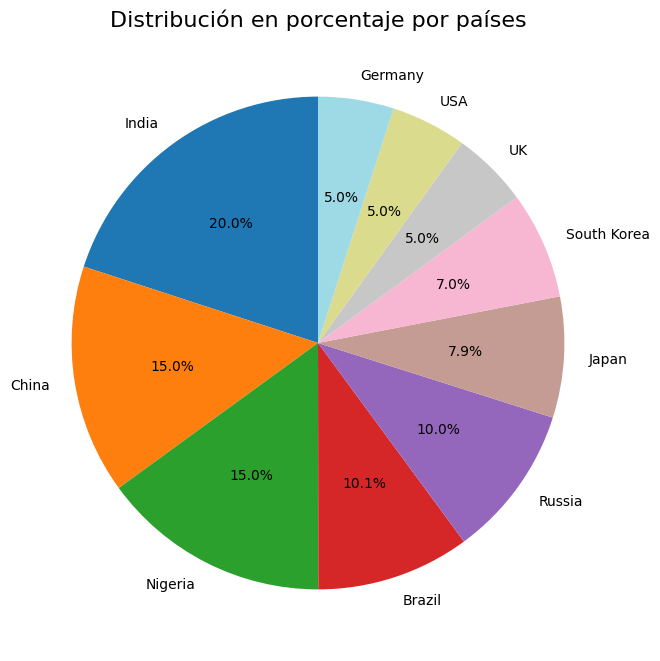

In [79]:
# Contar la cantidad de registros por país
distribucion_paises = df_thyroid['País'].value_counts()

# Crear el gráfico de pastel
plt.figure(figsize=(10, 8))
distribucion_paises.plot.pie(autopct='%1.1f%%', startangle=90, cmap='tab20', legend=False)
plt.title("Distribución en porcentaje por países", fontsize=16)
plt.ylabel("")  # Eliminar la etiqueta del eje Y
plt.show()

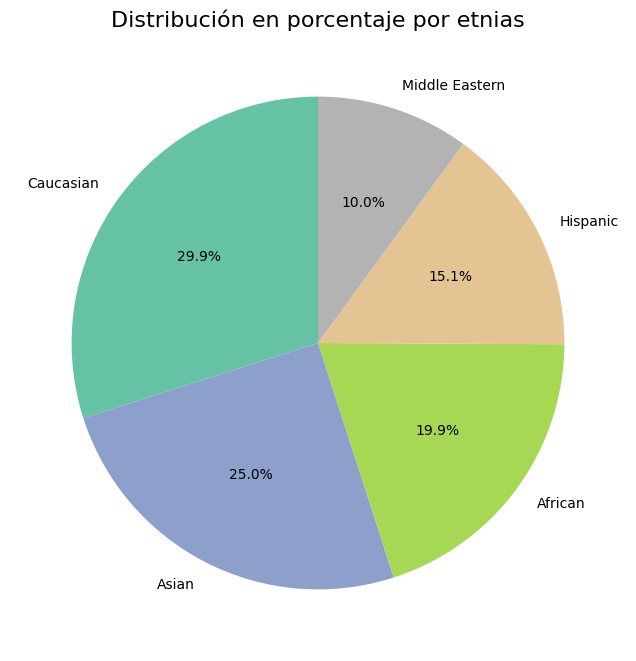

In [101]:
# Contar la cantidad de registros por país
distribucion_etnia = df_thyroid['Etnicidad'].value_counts()

# Crear el gráfico de pastel
plt.figure(figsize=(10, 8))
distribucion_etnia.plot.pie(autopct='%1.1f%%', startangle=90, cmap='Set2', legend=False)
plt.title("Distribución en porcentaje por etnias", fontsize=16)
plt.ylabel("")  # Eliminar la etiqueta del eje Y
plt.show()

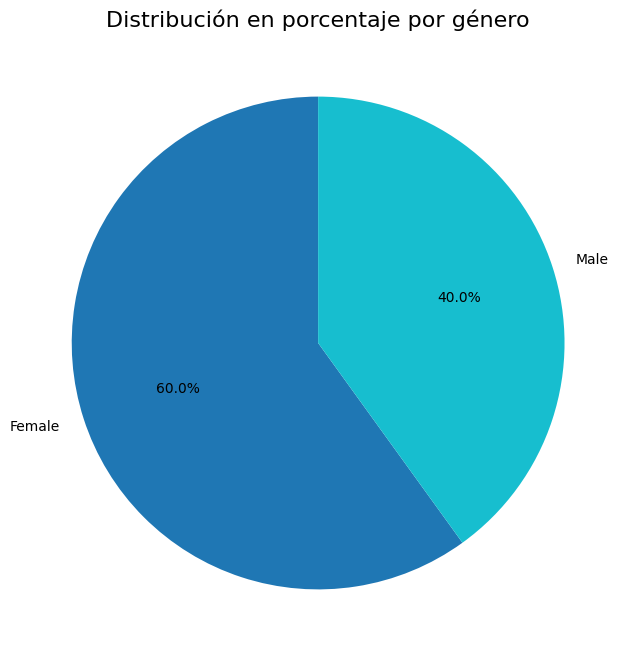

In [102]:
# Contar la cantidad de registros por país
Distribucion_genero = df_thyroid['Género'].value_counts()

# Crear el gráfico de pastel
plt.figure(figsize=(10, 8))
Distribucion_genero.plot.pie(autopct='%1.1f%%', startangle=90, cmap='tab10', legend=False)
plt.title("Distribución en porcentaje por género", fontsize=16)
plt.ylabel("")  # Eliminar la etiqueta del eje Y
plt.show()

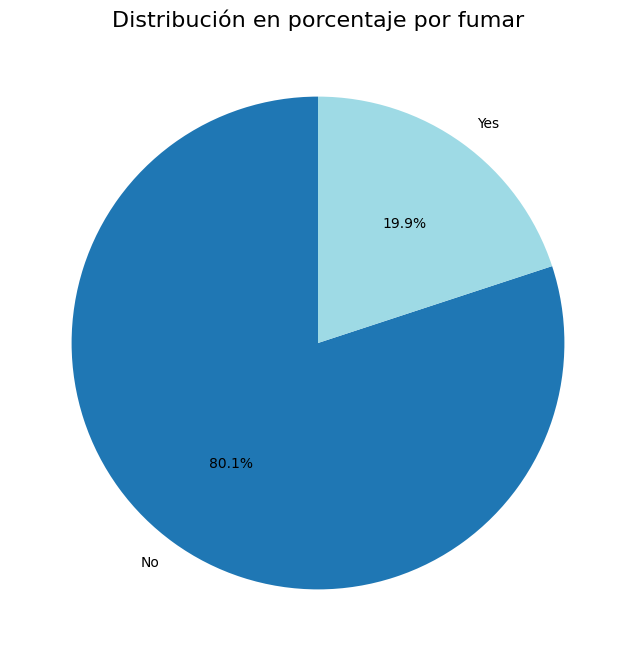

In [88]:
# Contar la cantidad de registros por país
Distribucion_fumar = df_thyroid['Fumar'].value_counts()

# Crear el gráfico de pastel
plt.figure(figsize=(10, 8))
Distribucion_fumar.plot.pie(autopct='%1.1f%%', startangle=90, cmap='tab20', legend=False)
plt.title("Distribución en porcentaje por fumar", fontsize=16)
plt.ylabel("")  # Eliminar la etiqueta del eje Y
plt.show()

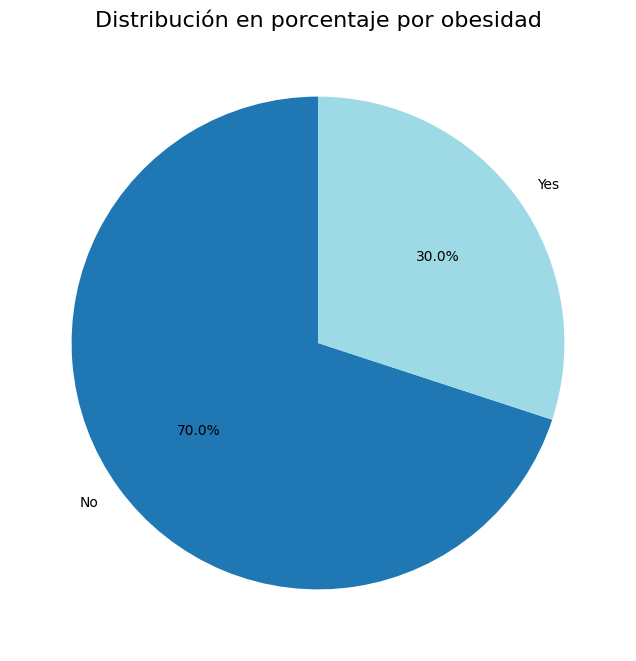

In [89]:
# Contar la cantidad de registros por país
Distribucion_obesidad = df_thyroid['Obesidad'].value_counts()

# Crear el gráfico de pastel
plt.figure(figsize=(10, 8))
Distribucion_obesidad.plot.pie(autopct='%1.1f%%', startangle=90, cmap='tab20', legend=False)
plt.title("Distribución en porcentaje por obesidad", fontsize=16)
plt.ylabel("")  # Eliminar la etiqueta del eje Y
plt.show()

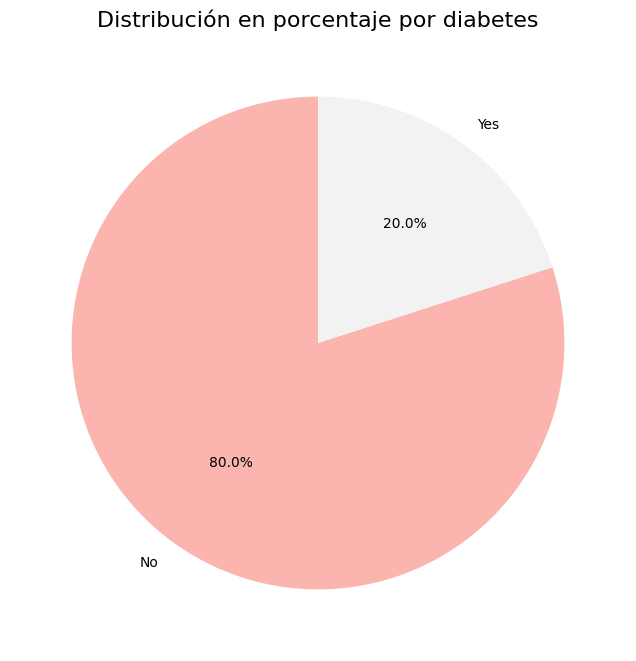

In [98]:
# Contar la cantidad de registros por país
Distribucion_diabetes = df_thyroid['Diabetes'].value_counts()

# Crear el gráfico de pastel
plt.figure(figsize=(10, 8))
Distribucion_diabetes.plot.pie(autopct='%1.1f%%', startangle=90, cmap='Pastel1', legend=False)
plt.title("Distribución en porcentaje por diabetes", fontsize=16)
plt.ylabel("")  # Eliminar la etiqueta del eje Y
plt.show()

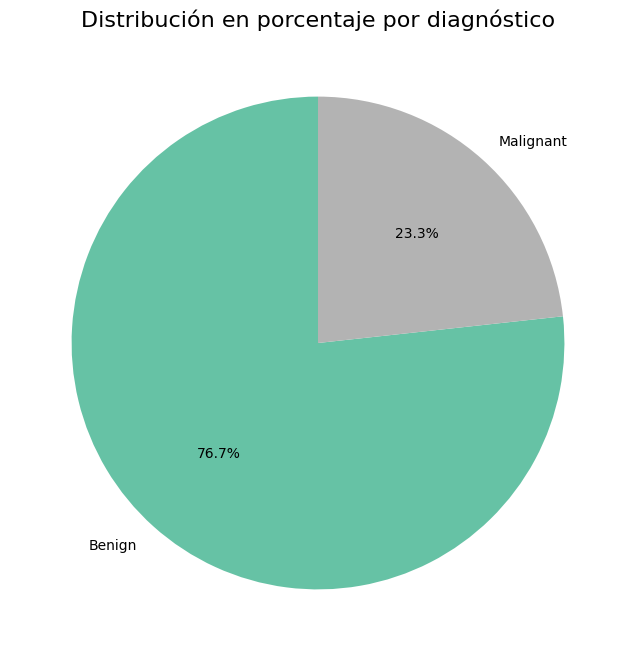

In [97]:
# Contar la cantidad de registros por país
Distribucion_diagnostico = df_thyroid['Diagnóstico'].value_counts()

# Crear el gráfico de pastel
plt.figure(figsize=(10, 8))
Distribucion_diagnostico.plot.pie(autopct='%1.1f%%', startangle=90, cmap='Set2', legend=False)
plt.title("Distribución en porcentaje por diagnóstico", fontsize=16)
plt.ylabel("")  # Eliminar la etiqueta del eje Y
plt.show()

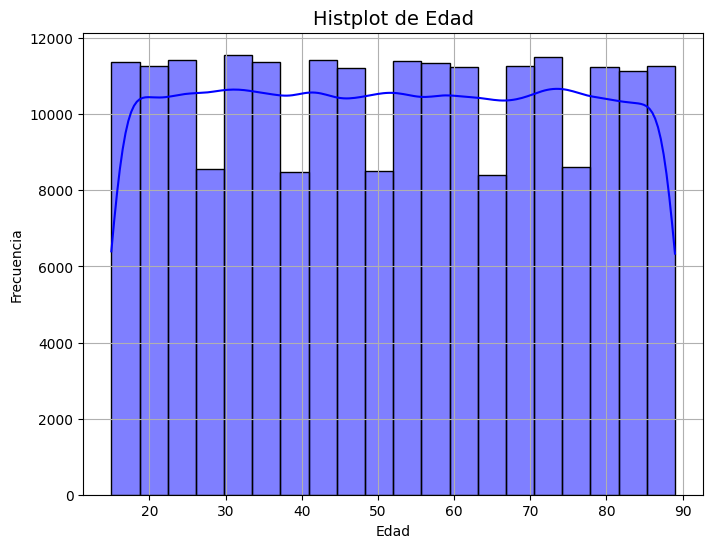

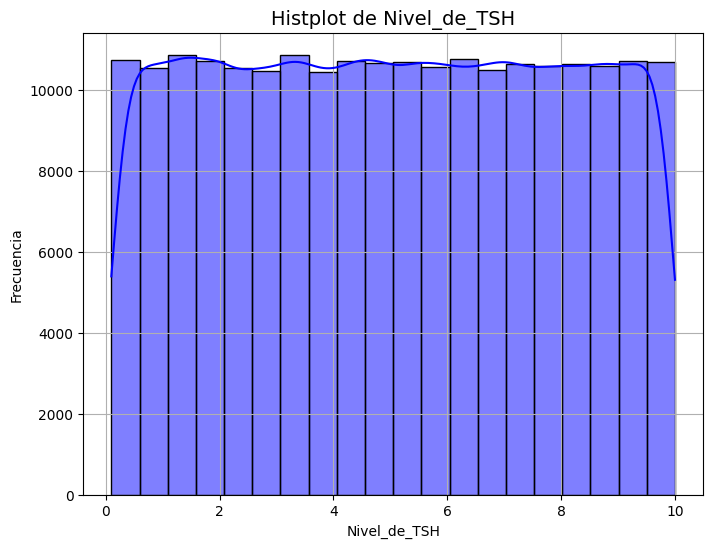

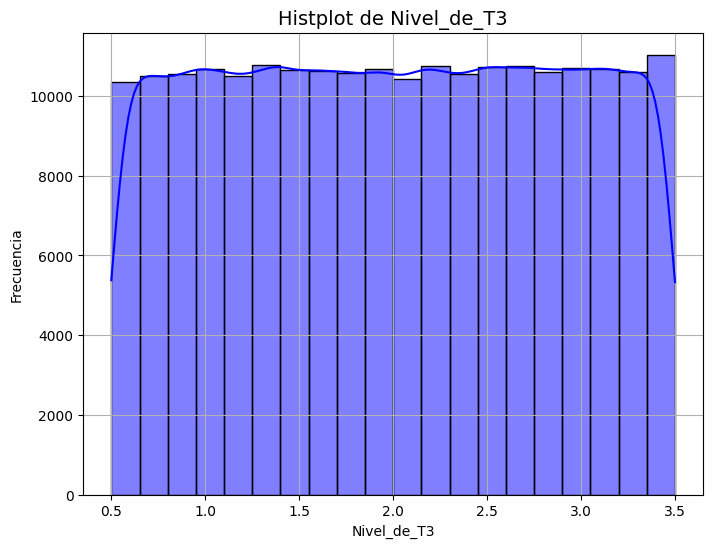

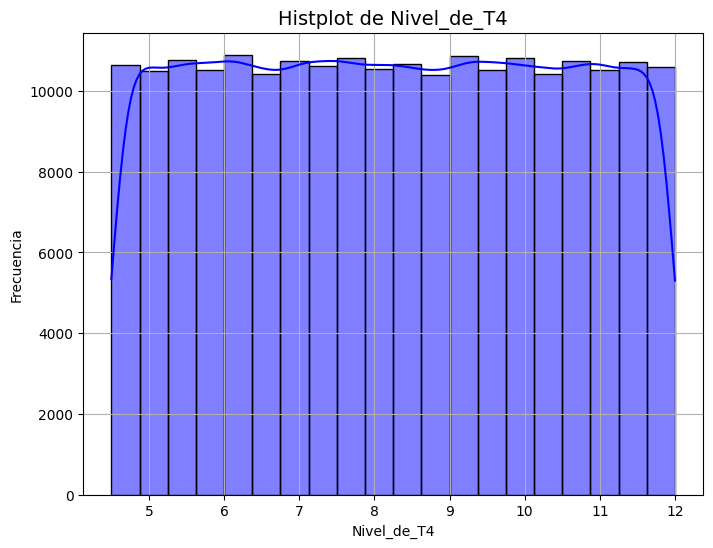

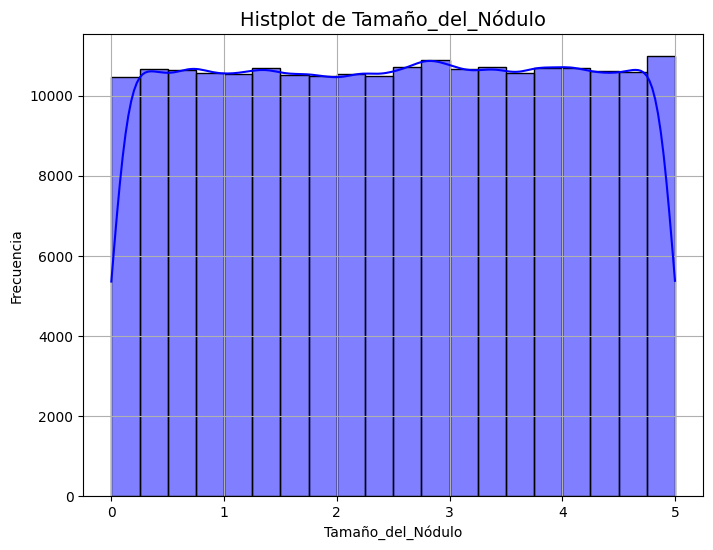

In [109]:
# Seleccionar las columnas numéricas
columnas_numericas = df_thyroid.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Crear un histplot para cada columna numérica
for col in columnas_numericas:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df_thyroid, x=col, kde=True, bins=20, color='blue')  # Histplot con KDE
    plt.title(f"Histplot de {col}", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.grid(True)
    plt.show()

In [125]:
df.head()

df1 = df.copy()

df1.head()



,ID del Paciente,Edad,Género,Contaminación del Aire,Consumo de Alcohol,Alergia al Polvo,Riesgos Ocupacionales,Riesgo Genético,Enfermedad Pulmonar Crónica,Dieta Balanceada,Obesidad,Fumar,Fumador Pasivo,Dolor de Pecho,Tos con Sangre,Fatiga,Pérdida de Peso,Dificultad para Respirar,Sibilancias,Dificultad para Tragar,Acropaquia,Resfriados Frecuentes,Tos Seca,Ronquidos,Nivel
index,,,,,,,,,,,,,,,,,,,,,,,,,
0,P1,33,1,2,4,5,4,3,2,2,4,3,2,2,4,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,2,2,4,2,3,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,7,2,3,4,8,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,7,7,7,7,8,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,7,8,7,7,9,3,2,4,1,4,2,4,2,3,High


In [ ]:
# 2. Codificar las variables categóricas
# Convertir la columna objetivo 'Nivel' en valores numéricos
df1['Nivel'] = df1['Nivel'].map({'Low': 0, 'Medium': 1, 'High': 2})



In [127]:
df1.head()

,ID del Paciente,Edad,Género,Contaminación del Aire,Consumo de Alcohol,Alergia al Polvo,Riesgos Ocupacionales,Riesgo Genético,Enfermedad Pulmonar Crónica,Dieta Balanceada,Obesidad,Fumar,Fumador Pasivo,Dolor de Pecho,Tos con Sangre,Fatiga,Pérdida de Peso,Dificultad para Respirar,Sibilancias,Dificultad para Tragar,Acropaquia,Resfriados Frecuentes,Tos Seca,Ronquidos,Nivel
index,,,,,,,,,,,,,,,,,,,,,,,,,
0,P1,33,1,2,4,5,4,3,2,2,4,3,2,2,4,3,4,2,2,3,1,2,3,4,0
1,P10,17,1,3,1,5,3,4,2,2,2,2,4,2,3,1,3,7,8,6,2,1,7,2,1
2,P100,35,1,4,5,6,5,5,4,6,7,2,3,4,8,8,7,9,2,1,4,6,7,2,2
3,P1000,37,1,7,7,7,7,6,7,7,7,7,7,7,8,4,2,3,1,4,5,6,7,5,2
4,P101,46,1,6,8,7,7,7,6,7,7,8,7,7,9,3,2,4,1,4,2,4,2,3,2


In [129]:
# 3. Dividir en variables predictoras (X) y variable objetivo (y).
X = df1.drop(columns=['ID del Paciente', 'Nivel'])
y = df1['Nivel']

In [136]:
# Verificar la distribución de la columna objetivo
print("Distribución de la columna objetivo (y) en %:")
print(y.value_counts(normalize=True)*100)  # Proporción de cada clase


Distribución de la columna objetivo (y) en %:
Nivel
2    36.5
1    33.2
0    30.3
Name: proportion, dtype: float64


In [ ]:
# 4. Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [141]:
# Verificar las formas de los conjuntos de entrenamiento y prueba. (que tienen la misma cantidad de columnas)
X_train.shape

(800, 23)

In [142]:
y_train.shape

(800,)

In [143]:
X_test.shape

(200, 23)

In [144]:
y_test.shape

(200,)

In [165]:
# 1. Crear el modelo
modelo = DecisionTreeClassifier(max_depth=2, min_samples_leaf=6, random_state=42)

In [166]:
# 2. Entrenar el modelo con los datos de entrenamiento
modelo.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=6, random_state=42)

In [167]:
# 3. Hacer predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test)

In [168]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.95      0.87        55
           1       1.00      0.81      0.89        63
           2       0.95      0.99      0.97        82

    accuracy                           0.92       200
   macro avg       0.92      0.91      0.91       200
weighted avg       0.93      0.92      0.92       200



In [ ]:
# 1. Crear el modelo Random Forest
modelo_rf = RandomForestClassifier(n_estimators=10, max_depth=2, random_state=42)

In [183]:
# 2. Entrenar el modelo con los datos de entrenamiento
modelo_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, n_estimators=10, random_state=42)

In [184]:
# 3. Hacer predicciones en el conjunto de prueba
y_pred_rf = modelo_rf.predict(X_test)

In [185]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        55
           1       0.90      0.98      0.94        63
           2       0.96      0.99      0.98        82

    accuracy                           0.95       200
   macro avg       0.95      0.94      0.95       200
weighted avg       0.95      0.95      0.95       200



In [196]:
# Definir el modelo base
modelo_rf = RandomForestClassifier(random_state=42)

# Definir los hiperparámetros a probar
param_grid = {
    'n_estimators': [5, 10, 15],  # Número de árboles
    'max_depth': [1, 2, 4],         # Profundidad máxima
    'min_samples_split': [2, 5, 10]  # Mínimo de muestras para dividir un nodo
}

# Configurar Grid Search con validación cruzada
grid_search = GridSearchCV(estimator=modelo_rf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Ejecutar Grid Search
grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros
print("Mejores hiperparámetros:", grid_search.best_params_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Mejores hiperparámetros: {'max_depth': 4, 'min_samples_split': 2, 'n_estimators': 15}


In [197]:
# Entrenar el modelo final con los mejores hiperparámetros
mejor_modelo_rf = grid_search.best_estimator_

In [198]:
# Evaluar el modelo final
y_pred = mejor_modelo_rf.predict(X_test)

In [ ]:
# Entrenar el modelo final con los mejores hiperparámetros
mejor_modelo_rf = grid_search.best_estimator_

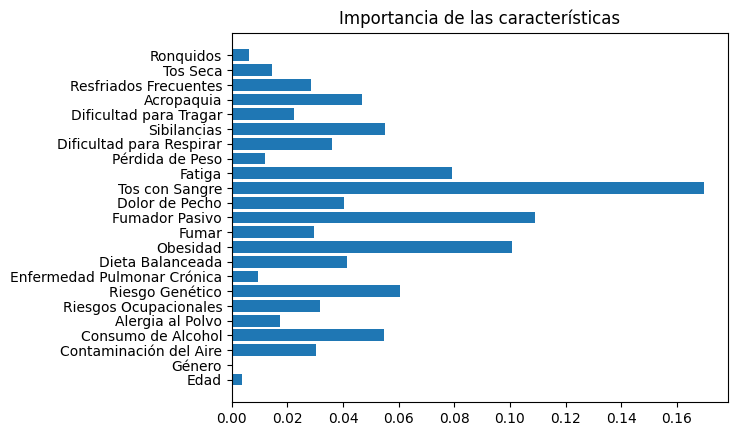

In [201]:
importances = mejor_modelo_rf.feature_importances_
plt.barh(X.columns, importances)
plt.title("Importancia de las características")
plt.show()

In [156]:
df_lung.head()

,País,Tamaño_Población,Edad,Género,Fumador,Años_Fumando,Cigarrillos_por_Día,Fumador_Pasivo,Historial_Familiar,Diagnóstico_Cáncer_Pulmonar,Años_Supervivencia,Tipo_Adenocarcinoma,Exposición_Contaminación_Aire,Exposición_Ocupacional,Contaminación_Interior,Acceso_Salud,Detección_Temprana,Desarrollado_o_En_Desarrollo,Muertes_Anuales_Cáncer_Pulmonar,Tasa_Prevalencia_Cáncer_Pulmonar,Tasa_Mortalidad
ID,,,,,,,,,,,,,,,,,,,,,
0,China,1400,80,Male,Yes,30,29,No,No,No,0,Yes,Low,Yes,No,Poor,No,Developing,690000,2.44,0.0
1,Iran,84,53,Male,No,0,0,Yes,No,No,0,Yes,Low,Yes,No,Poor,No,Developing,27000,2.10,0.0
2,Mexico,128,47,Male,Yes,12,6,Yes,No,No,0,Yes,Medium,No,No,Poor,Yes,Developing,28000,1.11,0.0
3,Indonesia,273,39,Female,No,0,0,No,Yes,No,0,Yes,Low,No,No,Poor,No,Developing,40000,0.75,0.0
4,South Africa,59,44,Female,No,0,0,Yes,No,No,0,Yes,Medium,Yes,No,Poor,No,Developing,15000,2.44,0.0


In [288]:
df_lung.head()

,Edad,Género,Fumador,Años_Fumando,Cigarrillos_por_Día,Fumador_Pasivo,Historial_Familiar,Diagnóstico_Cáncer_Pulmonar,Tipo_Adenocarcinoma,Exposición_Contaminación_Aire,Exposición_Ocupacional,Contaminación_Interior,Acceso_Salud,Detección_Temprana,Desarrollado_o_En_Desarrollo,Muertes_Anuales_Cáncer_Pulmonar,Tasa_Prevalencia_Cáncer_Pulmonar,Tasa_Mortalidad
ID,,,,,,,,,,,,,,,,,,
0,80,Male,Yes,30,29,No,No,No,Yes,Low,Yes,No,Poor,No,Developing,690000,2.44,0.0
1,53,Male,No,0,0,Yes,No,No,Yes,Low,Yes,No,Poor,No,Developing,27000,2.10,0.0
2,47,Male,Yes,12,6,Yes,No,No,Yes,Medium,No,No,Poor,Yes,Developing,28000,1.11,0.0
3,39,Female,No,0,0,No,Yes,No,Yes,Low,No,No,Poor,No,Developing,40000,0.75,0.0
4,44,Female,No,0,0,Yes,No,No,Yes,Medium,Yes,No,Poor,No,Developing,15000,2.44,0.0


In [337]:
df_lung1 = df_lung.copy()

In [338]:
df_lung1.head()

,Edad,Género,Fumador,Años_Fumando,Cigarrillos_por_Día,Fumador_Pasivo,Historial_Familiar,Diagnóstico_Cáncer_Pulmonar,Tipo_Adenocarcinoma,Exposición_Contaminación_Aire,Exposición_Ocupacional,Contaminación_Interior,Acceso_Salud,Detección_Temprana,Desarrollado_o_En_Desarrollo,Muertes_Anuales_Cáncer_Pulmonar,Tasa_Prevalencia_Cáncer_Pulmonar,Tasa_Mortalidad
ID,,,,,,,,,,,,,,,,,,
0,80,Male,Yes,30,29,No,No,No,Yes,Low,Yes,No,Poor,No,Developing,690000,2.44,0.0
1,53,Male,No,0,0,Yes,No,No,Yes,Low,Yes,No,Poor,No,Developing,27000,2.10,0.0
2,47,Male,Yes,12,6,Yes,No,No,Yes,Medium,No,No,Poor,Yes,Developing,28000,1.11,0.0
3,39,Female,No,0,0,No,Yes,No,Yes,Low,No,No,Poor,No,Developing,40000,0.75,0.0
4,44,Female,No,0,0,Yes,No,No,Yes,Medium,Yes,No,Poor,No,Developing,15000,2.44,0.0


In [339]:
df_lung1 = pd.get_dummies(df_lung1, drop_first=True)

In [340]:
df_lung1.head()

,Edad,Años_Fumando,Cigarrillos_por_Día,Muertes_Anuales_Cáncer_Pulmonar,Tasa_Prevalencia_Cáncer_Pulmonar,Tasa_Mortalidad,Género_Male,Fumador_Yes,Fumador_Pasivo_Yes,Historial_Familiar_Yes,Diagnóstico_Cáncer_Pulmonar_Yes,Tipo_Adenocarcinoma_Yes,Exposición_Contaminación_Aire_Low,Exposición_Contaminación_Aire_Medium,Exposición_Ocupacional_Yes,Contaminación_Interior_Yes,Acceso_Salud_Poor,Detección_Temprana_Yes,Desarrollado_o_En_Desarrollo_Developing
ID,,,,,,,,,,,,,,,,,,,
0,80,30,29,690000,2.44,0.0,True,True,False,False,False,True,True,False,True,False,True,False,True
1,53,0,0,27000,2.10,0.0,True,False,True,False,False,True,True,False,True,False,True,False,True
2,47,12,6,28000,1.11,0.0,True,True,True,False,False,True,False,True,False,False,True,True,True
3,39,0,0,40000,0.75,0.0,False,False,False,True,False,True,True,False,False,False,True,False,True
4,44,0,0,15000,2.44,0.0,False,False,True,False,False,True,False,True,True,False,True,False,True


In [341]:
X = df_lung1.drop(columns=['Tasa_Mortalidad'])
y = df_lung1['Tasa_Mortalidad']

In [343]:
X.shape

(220632, 18)

In [344]:
y.shape

(220632,)

In [345]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

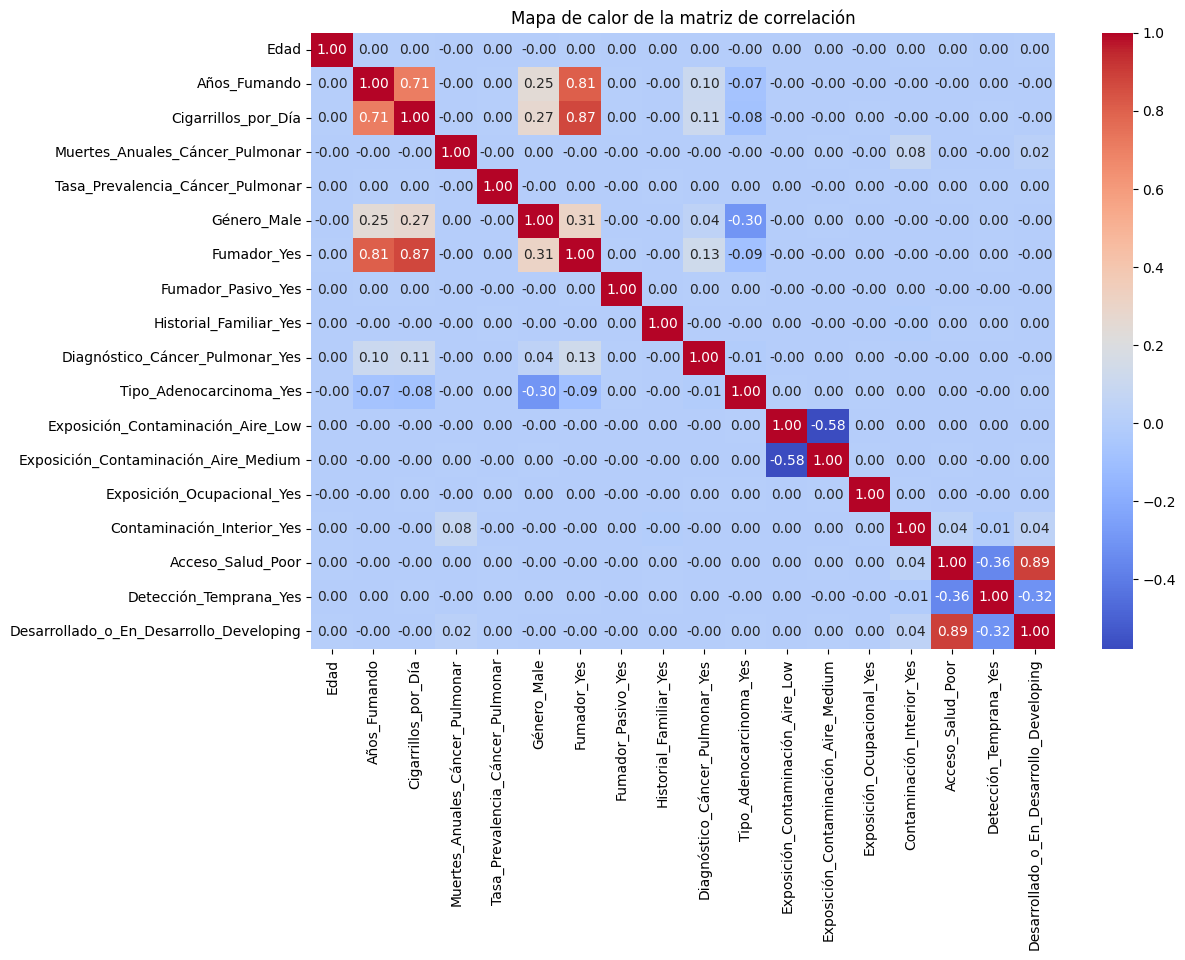

In [ ]:
# Calcular la matriz de correlación
correlation_matrix = pd.DataFrame(X_train_scaled, columns=X.columns).corr()

# Crear el mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

# Configurar el título
plt.title("Mapa de calor de la matriz de correlación")
plt.show()

In [355]:
# Estandarizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [366]:
X_train_scaled[:5]

array([[-0.02614932,  0.87307432,  1.52934563, -0.25991296,  0.18781685,
         1.00069711,  1.22157032,  1.53177025, -0.41777847, -0.20511297,
        -0.90716415, -0.5790403 ,  1.00237669, -0.65627455, -0.5481515 ,
         0.49917659,  1.60664644,  0.56075403],
       [-0.2358798 ,  2.56890581,  0.91699354, -0.29810581, -1.26558217,
         1.00069711,  1.22157032,  1.53177025, -0.41777847, -0.20511297,
         1.10233633, -0.5790403 ,  1.00237669, -0.65627455, -0.5481515 ,
         0.49917659, -0.62241448,  0.56075403],
       [-0.39317766, -0.01521836,  1.83552167, -0.25227439, -0.27934712,
        -0.99930338,  1.22157032, -0.65283942, -0.41777847, -0.20511297,
        -0.90716415, -0.5790403 , -0.99762894,  1.52375253, -0.5481515 ,
         0.49917659, -0.62241448, -1.78331309],
       [-1.07480171,  0.9538282 ,  0.50875881, -0.08603621, -0.3485566 ,
        -0.99930338,  1.22157032, -0.65283942,  2.39361307, -0.20511297,
         1.10233633, -0.5790403 ,  1.00237669, -0.656

In [356]:
modelo_rf_lung1 = RandomForestRegressor(n_estimators=10, max_depth=2, random_state=42)

modelo_rf_lung1.fit(X_train, y_train)

y_pred = modelo_rf_lung1.predict(X_test)

In [371]:
# Evaluar el modelo en el conjunto de entrenamiento
y_train_pred = modelo_rf_lung1.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = mse_train ** 0.5
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Mostrar resultados en el conjunto de entrenamiento
print("Resultados en el conjunto de entrenamiento:")
print(f"Error cuadrático medio (MSE): {mse_train:.2f}")
print(f"Raíz del error cuadrático medio (RMSE): {rmse_train:.2f}")
print(f"Mean Absolute Error (MAE): {mae_train:.2f}")
print(f"Coeficiente de determinación (R²): {r2_train:.2f}")

Resultados en el conjunto de entrenamiento:
Error cuadrático medio (MSE): 2.97
Raíz del error cuadrático medio (RMSE): 1.72
Mean Absolute Error (MAE): 0.30
Coeficiente de determinación (R²): 0.99


In [360]:
# Definir los hiperparámetros a ajustar
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Configurar Grid Search
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=1,
    n_jobs=-1
)

In [361]:
# Ajustar el modelo
grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros
print("Mejores hiperparámetros:", grid_search.best_params_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Mejores hiperparámetros: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}


In [362]:
# Obtener el mejor modelo
mejor_modelo_rf_lung1 = grid_search.best_estimator_

# Hacer predicciones con el mejor modelo
y_pred_mejor = mejor_modelo_rf_lung1.predict(X_test)

In [374]:
# Evaluar el mejor modelo
mse_mejor = mean_squared_error(y_test, y_pred_mejor)
rmse_mejor = mse_mejor ** 0.5
mae_mejor = mean_absolute_error(y_test, y_pred_mejor)
r2_mejor = r2_score(y_test, y_pred_mejor)

# Mostrar resultados del mejor modelo
print("Resultados en el conjunto de modelo con hiperparámetros:")
print(f"Error cuadrático medio (MSE): {mse_mejor:.2f}")
print(f"Raíz del error cuadrático medio (RMSE): {rmse_mejor:.2f}")
print(f"Mean Absolute Error (MAE): {mae_mejor:.2f}")
print(f"Coeficiente de determinación (R²): {r2_mejor:.2f}")

Resultados en el conjunto de modelo con hiperparámetros:
Error cuadrático medio (MSE): 3.20
Raíz del error cuadrático medio (RMSE): 1.79
Mean Absolute Error (MAE): 0.32
Coeficiente de determinación (R²): 0.99


In [372]:
# Evaluar el modelo en el conjunto de entrenamiento
y_train_pred = modelo_rf_lung1.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = mse_train ** 0.5
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Mostrar resultados en el conjunto de entrenamiento
print("Resultados en el conjunto de entrenamiento:")
print(f"Error cuadrático medio (MSE): {mse_train:.2f}")
print(f"Raíz del error cuadrático medio (RMSE): {rmse_train:.2f}")
print(f"Mean Absolute Error (MAE): {mae_train:.2f}")
print(f"Coeficiente de determinación (R²): {r2_train:.2f}")

Resultados en el conjunto de entrenamiento:
Error cuadrático medio (MSE): 2.97
Raíz del error cuadrático medio (RMSE): 1.72
Mean Absolute Error (MAE): 0.30
Coeficiente de determinación (R²): 0.99


In [4]:
df_thyroid.head()

,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
Patient_ID,,,,,,,,,,,,,,,,
1,66,Male,Russia,Caucasian,No,Yes,No,No,No,No,9.37,1.67,6.16,1.08,Low,Benign
2,29,Male,Germany,Hispanic,No,Yes,No,No,No,No,1.83,1.73,10.54,4.05,Low,Benign
3,86,Male,Nigeria,Caucasian,No,No,No,No,No,No,6.26,2.59,10.57,4.61,Low,Benign
4,75,Female,India,Asian,No,No,No,No,No,No,4.10,2.62,11.04,2.46,Medium,Benign
5,35,Female,Germany,African,Yes,Yes,No,No,No,No,9.10,2.11,10.71,2.11,High,Benign


In [5]:
df_thyroid1 = df_thyroid.copy()

In [6]:
df_thyroid1.head()

,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
Patient_ID,,,,,,,,,,,,,,,,
1,66,Male,Russia,Caucasian,No,Yes,No,No,No,No,9.37,1.67,6.16,1.08,Low,Benign
2,29,Male,Germany,Hispanic,No,Yes,No,No,No,No,1.83,1.73,10.54,4.05,Low,Benign
3,86,Male,Nigeria,Caucasian,No,No,No,No,No,No,6.26,2.59,10.57,4.61,Low,Benign
4,75,Female,India,Asian,No,No,No,No,No,No,4.10,2.62,11.04,2.46,Medium,Benign
5,35,Female,Germany,African,Yes,Yes,No,No,No,No,9.10,2.11,10.71,2.11,High,Benign


In [7]:
df_thyroid1 = df_thyroid1.drop(columns=['Country', 'Ethnicity',])

In [8]:
df_thyroid1.head()

,Age,Gender,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
Patient_ID,,,,,,,,,,,,,,
1,66,Male,No,Yes,No,No,No,No,9.37,1.67,6.16,1.08,Low,Benign
2,29,Male,No,Yes,No,No,No,No,1.83,1.73,10.54,4.05,Low,Benign
3,86,Male,No,No,No,No,No,No,6.26,2.59,10.57,4.61,Low,Benign
4,75,Female,No,No,No,No,No,No,4.10,2.62,11.04,2.46,Medium,Benign
5,35,Female,Yes,Yes,No,No,No,No,9.10,2.11,10.71,2.11,High,Benign


In [9]:
# Crear el codificador
label_encoder = LabelEncoder()

# Convertir la variable objetivo a números
df_thyroid1['Thyroid_Cancer_Risk_Encoded'] = label_encoder.fit_transform(df_thyroid1['Thyroid_Cancer_Risk'])

# Verificar la conversión
print(df_thyroid1[['Thyroid_Cancer_Risk', 'Thyroid_Cancer_Risk_Encoded']].head())

           Thyroid_Cancer_Risk  Thyroid_Cancer_Risk_Encoded
Patient_ID                                                 
1                          Low                            1
2                          Low                            1
3                          Low                            1
4                       Medium                            2
5                         High                            0


In [10]:
df_thyroid1.head()

,Age,Gender,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis,Thyroid_Cancer_Risk_Encoded
Patient_ID,,,,,,,,,,,,,,,
1,66,Male,No,Yes,No,No,No,No,9.37,1.67,6.16,1.08,Low,Benign,1
2,29,Male,No,Yes,No,No,No,No,1.83,1.73,10.54,4.05,Low,Benign,1
3,86,Male,No,No,No,No,No,No,6.26,2.59,10.57,4.61,Low,Benign,1
4,75,Female,No,No,No,No,No,No,4.10,2.62,11.04,2.46,Medium,Benign,2
5,35,Female,Yes,Yes,No,No,No,No,9.10,2.11,10.71,2.11,High,Benign,0


In [11]:
df_thyroid1 = pd.get_dummies(df_thyroid1, drop_first=True)
df_thyroid1.head()

,Age,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk_Encoded,Gender_Male,Family_History_Yes,Radiation_Exposure_Yes,Iodine_Deficiency_Yes,Smoking_Yes,Obesity_Yes,Diabetes_Yes,Thyroid_Cancer_Risk_Low,Thyroid_Cancer_Risk_Medium,Diagnosis_Malignant
Patient_ID,,,,,,,,,,,,,,,,
1,66,9.37,1.67,6.16,1.08,1,True,False,True,False,False,False,False,True,False,False
2,29,1.83,1.73,10.54,4.05,1,True,False,True,False,False,False,False,True,False,False
3,86,6.26,2.59,10.57,4.61,1,True,False,False,False,False,False,False,True,False,False
4,75,4.10,2.62,11.04,2.46,2,False,False,False,False,False,False,False,False,True,False
5,35,9.10,2.11,10.71,2.11,0,False,True,True,False,False,False,False,False,False,False


In [24]:
df_thyroid1 = df_thyroid1.drop(columns=['Thyroid_Cancer_Risk_Medium', 'Thyroid_Cancer_Risk_Low'])

In [25]:
# Definir las variables predictoras (X) y la variable objetivo (y)
X = df_thyroid1.drop(columns=['Thyroid_Cancer_Risk_Encoded'])  # Variables predictoras
y = df_thyroid1['Thyroid_Cancer_Risk_Encoded']  # Variable objetivo numérica

In [26]:
# Dividir los datos en conjuntos de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
X_train.head()

,Age,TSH_Level,T3_Level,T4_Level,Nodule_Size,Gender_Male,Family_History_Yes,Radiation_Exposure_Yes,Iodine_Deficiency_Yes,Smoking_Yes,Obesity_Yes,Diabetes_Yes,Diagnosis_Malignant
Patient_ID,,,,,,,,,,,,,
117333,17,6.42,2.11,9.67,2.74,False,False,False,False,False,True,False,True
63421,79,5.67,3.31,11.11,1.36,False,True,False,False,False,False,False,True
179949,79,6.06,0.64,11.07,3.25,False,True,False,True,False,True,False,True
187372,68,4.97,1.93,11.56,4.40,False,False,False,False,False,False,False,False
103130,42,7.83,3.37,9.42,0.18,False,False,True,False,False,False,True,False


In [31]:
# Crear y entrenar el modelo Random Forest
modelo_rf_thy = RandomForestClassifier(random_state=42, class_weight='balanced')
modelo_rf_thy.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = modelo_rf_thy.predict(X_test)

# Evaluar el modelo
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))
print(f"Exactitud (Accuracy): {accuracy_score(y_test, y_pred):.2f}")

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.63      0.66      0.65      6398
           1       0.56      0.80      0.66     21693
           2       0.36      0.12      0.18     14448

    accuracy                           0.55     42539
   macro avg       0.52      0.53      0.50     42539
weighted avg       0.50      0.55      0.50     42539

Exactitud (Accuracy): 0.55


In [29]:
# Definir los hiperparámetros a ajustar
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Configurar GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

# Ajustar el modelo
grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros
print("Mejores hiperparámetros:", grid_search.best_params_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Mejores hiperparámetros: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}


In [30]:
# Evaluar el mejor modelo
mejor_modelo_rf = grid_search.best_estimator_
y_pred_mejor = mejor_modelo_rf.predict(X_test)

print("\nReporte de clasificación del mejor modelo:")
print(classification_report(y_test, y_pred_mejor))
print(f"Exactitud (Accuracy): {accuracy_score(y_test, y_pred_mejor):.2f}")


Reporte de clasificación del mejor modelo:
              precision    recall  f1-score   support

           0       0.64      0.69      0.66      6398
           1       0.57      0.93      0.70     21693
           2       0.33      0.00      0.00     14448

    accuracy                           0.58     42539
   macro avg       0.51      0.54      0.46     42539
weighted avg       0.50      0.58      0.46     42539

Exactitud (Accuracy): 0.58


In [33]:
# Estandarizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
# Crear y entrenar el modelo SVM
modelo_svm = SVC(class_weight='balanced', random_state=42)
modelo_svm.fit(X_train_scaled, y_train)

# Hacer predicciones
y_pred_svm = modelo_svm.predict(X_test_scaled)

# Evaluar el modelo
print("\nReporte de clasificación con SVM:")
print(classification_report(y_test, y_pred_svm))
print(f"Exactitud (Accuracy): {accuracy_score(y_test, y_pred_svm):.2f}")


Reporte de clasificación con SVM:
              precision    recall  f1-score   support

           0       0.50      0.80      0.62      6398
           1       0.58      0.38      0.46     21693
           2       0.38      0.48      0.43     14448

    accuracy                           0.48     42539
   macro avg       0.49      0.55      0.50     42539
weighted avg       0.50      0.48      0.47     42539

Exactitud (Accuracy): 0.48


In [36]:
# Crear y entrenar el modelo XGBoost
modelo_xgb = XGBClassifier(random_state=42)
modelo_xgb.fit(X_train_scaled, y_train)

# Hacer predicciones
y_pred_xgb = modelo_xgb.predict(X_test_scaled)

# Evaluar el modelo
print("\nReporte de clasificación con XGBoost:")
print(classification_report(y_test, y_pred_xgb))
print(f"Exactitud (Accuracy): {accuracy_score(y_test, y_pred_xgb):.2f}")


Reporte de clasificación con XGBoost:
              precision    recall  f1-score   support

           0       0.63      0.69      0.66      6398
           1       0.57      0.90      0.69     21693
           2       0.37      0.03      0.06     14448

    accuracy                           0.57     42539
   macro avg       0.52      0.54      0.47     42539
weighted avg       0.51      0.57      0.47     42539

Exactitud (Accuracy): 0.57


In [44]:
# Definir los hiperparámetros a ajustar
param_grid = {
    'n_estimators': [200, 400],          # Número de árboles
    'max_depth': [20, 40,],                 # Profundidad máxima de los árboles
    'learning_rate': [0.01, 0.1,],      # Tasa de aprendizaje
    'subsample': [0.2, 0.4,],                # Porcentaje de muestras usadas para entrenar cada árbol
    'colsample_bytree': [0.2, 0.4,],         # Porcentaje de características usadas por árbol
    
}

# Configurar GridSearchCV
grid_search = GridSearchCV(
    estimator=XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss'),
    param_grid=param_grid,
    cv=5,                                   # Validación cruzada con 5 particiones
    scoring='accuracy',                     # Métrica de evaluación
    verbose=1,                              # Mostrar progreso
    n_jobs=-1                               # Usar todos los núcleos disponibles
)

# Ajustar el modelo
grid_search.fit(X_train_scaled, y_train)

# Mostrar los mejores hiperparámetros
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)


Fitting 5 folds for each of 32 candidates, totalling 160 fits


c:\Users\Joaquín\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:21:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Mejores hiperparámetros encontrados:
{'colsample_bytree': 0.4, 'learning_rate': 0.01, 'max_depth': 20, 'n_estimators': 400, 'subsample': 0.2}


In [45]:
# Evaluar el mejor modelo
mejor_modelo_xgb = grid_search.best_estimator_
y_pred_mejor = mejor_modelo_xgb.predict(X_test_scaled)

print("\nReporte de clasificación del mejor modelo:")
print(classification_report(y_test, y_pred_mejor))
print(f"Exactitud (Accuracy): {accuracy_score(y_test, y_pred_mejor):.2f}")


Reporte de clasificación del mejor modelo:
              precision    recall  f1-score   support

           0       0.67      0.49      0.57      6398
           1       0.55      0.95      0.69     21693
           2       0.34      0.01      0.02     14448

    accuracy                           0.56     42539
   macro avg       0.52      0.48      0.43     42539
weighted avg       0.50      0.56      0.45     42539

Exactitud (Accuracy): 0.56


In [46]:
# Crear y entrenar el modelo Random Forest
modelo_rf_thy1 = RandomForestRegressor(random_state=42)
modelo_rf_thy1.fit(X_train_scaled, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = modelo_rf_thy1.predict(X_test_scaled)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Resultados del modelo Random Forest:")
print(f"Error cuadrático medio (MSE): {mse:.2f}")
print(f"Raíz del error cuadrático medio (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Coeficiente de determinación (R²): {r2:.2f}")

Resultados del modelo Random Forest:
Error cuadrático medio (MSE): 0.37
Raíz del error cuadrático medio (RMSE): 0.61
Mean Absolute Error (MAE): 0.53
Coeficiente de determinación (R²): 0.19


In [47]:
# Definir los hiperparámetros a ajustar
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Configurar GridSearchCV
grid_search_rf_thy = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid_rf,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=1,
    n_jobs=-1
)

# Ajustar el modelo
grid_search_rf_thy.fit(X_train_scaled, y_train)

# Mostrar los mejores hiperparámetros
print("Mejores hiperparámetros para Random Forest:")
print(grid_search_rf_thy.best_params_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Mejores hiperparámetros para Random Forest:
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}


In [49]:
# Evaluar el mejor modelo
mejor_modelo_rf_thy = grid_search_rf_thy.best_estimator_
y_pred_mejor = mejor_modelo_rf_thy.predict(X_test_scaled)

print("\nResultados del mejor modelo Random Forest:")
print(f"Error cuadrático medio (MSE): {mean_squared_error(y_test, y_pred_mejor):.2f}")
print(f"Coeficiente de determinación (R²): {r2_score(y_test, y_pred_mejor):.2f}")


Resultados del mejor modelo Random Forest:
Error cuadrático medio (MSE): 0.35
Coeficiente de determinación (R²): 0.22


In [51]:
# Crear y entrenar el modelo XGBoost
modelo_xgb = XGBRegressor(random_state=42)
modelo_xgb.fit(X_train_scaled, y_train)
y_pred_xgb = modelo_xgb.predict(X_test_scaled)

# Evaluar el modelo
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("Resultados del modelo XGBoost:")
print(f"Error cuadrático medio (MSE): {mse_xgb:.2f}")
print(f"Coeficiente de determinación (R²): {r2_xgb:.2f}")

Resultados del modelo XGBoost:
Error cuadrático medio (MSE): 0.36
Coeficiente de determinación (R²): 0.21


In [57]:
# Definir los hiperparámetros a ajustar
param_grid = {
    'n_estimators': [500, 700, 1000],
    'max_depth': [20, 40],
    'learning_rate': [0.6, 0.8],
    'subsample': [0.5],
    'colsample_bytree': [0.5],
}

# Configurar GridSearchCV
grid_search = GridSearchCV(
    estimator=XGBRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=1,
    n_jobs=-1
)

# Ajustar el modelo
grid_search.fit(X_train_scaled, y_train)

# Mostrar los mejores hiperparámetros
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# Evaluar el mejor modelo
mejor_modelo_xgb = grid_search.best_estimator_
y_pred_mejor = mejor_modelo_xgb.predict(X_test_scaled)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred_mejor)
r2 = r2_score(y_test, y_pred_mejor)

print("\nResultados del mejor modelo XGBoost:")
print(f"Error cuadrático medio (MSE): {mse:.2f}")
print(f"Coeficiente de determinación (R²): {r2:.2f}")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Mejores hiperparámetros encontrados:
{'colsample_bytree': 0.5, 'learning_rate': 0.6, 'max_depth': 40, 'n_estimators': 1000, 'subsample': 0.5}

Resultados del mejor modelo XGBoost:
Error cuadrático medio (MSE): 0.71
Coeficiente de determinación (R²): -0.57


In [118]:
df_thyroid = pd.read_csv(r'C:\BOOTCAMP_DATA_SCIENCE\Proyecto ML_CancerPredictionModel\ML_Cancer_Prediction_Models\src\data_sample\thyroid_cancer_risk_data.csv')

df_thyroid.set_index('Patient_ID', inplace=True)

df_thyroid.head()

,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
Patient_ID,,,,,,,,,,,,,,,,
1,66,Male,Russia,Caucasian,No,Yes,No,No,No,No,9.37,1.67,6.16,1.08,Low,Benign
2,29,Male,Germany,Hispanic,No,Yes,No,No,No,No,1.83,1.73,10.54,4.05,Low,Benign
3,86,Male,Nigeria,Caucasian,No,No,No,No,No,No,6.26,2.59,10.57,4.61,Low,Benign
4,75,Female,India,Asian,No,No,No,No,No,No,4.10,2.62,11.04,2.46,Medium,Benign
5,35,Female,Germany,African,Yes,Yes,No,No,No,No,9.10,2.11,10.71,2.11,High,Benign


In [119]:
df_thyroid_copy = df_thyroid.copy()

In [120]:
# Frequency Encoding
freq_map_country = df_thyroid_copy['Country'].value_counts(normalize=True).to_dict()
df_thyroid_copy['Country'] = df_thyroid_copy['Country'].map(freq_map_country)

freq_map_ethnicity = df_thyroid_copy['Ethnicity'].value_counts(normalize=True).to_dict()
df_thyroid_copy['Ethnicity'] = df_thyroid_copy['Ethnicity'].map(freq_map_ethnicity)

# One-Hot Encoding
one_hot_cols = ['Gender', 'Family_History', 'Radiation_Exposure','Iodine_Deficiency','Smoking','Obesity','Diabetes' ]
df_thyroid_copy = pd.get_dummies(df_thyroid_copy, columns=one_hot_cols)

# Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_thyroid_copy['Thyroid_Cancer_Risk'] = label_encoder.fit_transform(df_thyroid_copy['Thyroid_Cancer_Risk'])
df_thyroid_copy['Diagnosis'] = label_encoder.fit_transform(df_thyroid_copy['Diagnosis'])

# Verificar el resultado
print(df_thyroid_copy.head())

            Age   Country  Ethnicity  TSH_Level  T3_Level  T4_Level  \
Patient_ID                                                            
1            66  0.100131   0.299350       9.37      1.67      6.16   
2            29  0.049635   0.150509       1.83      1.73     10.54   
3            86  0.150067   0.299350       6.26      2.59     10.57   
4            75  0.199802   0.250415       4.10      2.62     11.04   
5            35  0.049635   0.199416       9.10      2.11     10.71   

            Nodule_Size  Thyroid_Cancer_Risk  Diagnosis  Gender_Female  \
Patient_ID                                                               
1                  1.08                    1          0          False   
2                  4.05                    1          0          False   
3                  4.61                    1          0          False   
4                  2.46                    2          0           True   
5                  2.11                    0          0   

In [121]:
# Definir las variables predictoras (X) y la variable objetivo (y)
X = df_thyroid_copy.drop(columns=['Diagnosis'])  # Variables predictoras
y = df_thyroid_copy['Diagnosis']  # Variable objetivo

# Dividir los datos en conjuntos de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar las formas de los conjuntos
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")

X_train: (170152, 22), X_test: (42539, 22)
y_train: (170152,), y_test: (42539,)


In [122]:
X_train.head()

,Age,Country,Ethnicity,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Gender_Female,Gender_Male,Family_History_No,Family_History_Yes,Radiation_Exposure_No,Radiation_Exposure_Yes,Iodine_Deficiency_No,Iodine_Deficiency_Yes,Smoking_No,Smoking_Yes,Obesity_No,Obesity_Yes,Diabetes_No,Diabetes_Yes
Patient_ID,,,,,,,,,,,,,,,,,,,,,,
117333,17,0.199802,0.100310,6.42,2.11,9.67,2.74,1,True,False,True,False,True,False,True,False,True,False,False,True,True,False
63421,79,0.150350,0.250415,5.67,3.31,11.11,1.36,0,True,False,False,True,True,False,True,False,True,False,True,False,True,False
179949,79,0.100131,0.250415,6.06,0.64,11.07,3.25,0,True,False,False,True,True,False,False,True,True,False,False,True,True,False
187372,68,0.100131,0.250415,4.97,1.93,11.56,4.40,1,True,False,True,False,True,False,True,False,True,False,True,False,True,False
103130,42,0.150067,0.199416,7.83,3.37,9.42,0.18,0,True,False,True,False,False,True,True,False,True,False,True,False,False,True


In [123]:
# Crear y entrenar el modelo XGBoost
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitud del modelo: {accuracy:.4f}")

# Reporte de clasificación detallado
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

c:\Users\Joaquín\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:08:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Exactitud del modelo: 0.8238

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89     32615
           1       0.69      0.44      0.54      9924

    accuracy                           0.82     42539
   macro avg       0.77      0.69      0.71     42539
weighted avg       0.81      0.82      0.81     42539



In [124]:
# Definir los hiperparámetros a ajustar
param_grid = {
    'n_estimators': [100, 200, 300],          # Número de árboles
    'max_depth': [3, 5, 7],                  # Profundidad máxima de los árboles
    'learning_rate': [0.01, 0.1, 0.2],       # Tasa de aprendizaje
    'subsample': [0.8, 1.0],                 # Porcentaje de muestras usadas para entrenar cada árbol
    'colsample_bytree': [0.8, 1.0],          # Porcentaje de características usadas por árbol
    'gamma': [0, 1, 5]                       # Reducción mínima de pérdida para dividir un nodo
}

# Configurar GridSearchCV
grid_search = GridSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    param_grid=param_grid,
    cv=5,                                   # Validación cruzada con 5 particiones
    scoring='accuracy',                     # Métrica de evaluación
    verbose=1,                              # Mostrar progreso
    n_jobs=-1                               # Usar todos los núcleos disponibles
)

# Ajustar el modelo
grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


c:\Users\Joaquín\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:21:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Mejores hiperparámetros encontrados:
{'colsample_bytree': 1.0, 'gamma': 5, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}


In [125]:
# Evaluar el mejor modelo
mejor_modelo_xgb = grid_search.best_estimator_
y_pred_mejor = mejor_modelo_xgb.predict(X_test)

# Evaluar el modelo
print("\nResultados del mejor modelo XGBoost:")
print(classification_report(y_test, y_pred_mejor))
print(f"Exactitud (Accuracy): {accuracy_score(y_test, y_pred_mejor):.2f}")


Resultados del mejor modelo XGBoost:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89     32615
           1       0.69      0.45      0.54      9924

    accuracy                           0.83     42539
   macro avg       0.77      0.69      0.72     42539
weighted avg       0.81      0.83      0.81     42539

Exactitud (Accuracy): 0.83


In [126]:
# Crear y entrenar el modelo Random Forest
model_rf_thy2 = RandomForestClassifier(random_state=42)
model_rf_thy2.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_rf = model_rf_thy2.predict(X_test)

# Evaluar el modelo
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Exactitud del modelo Random Forest: {accuracy_rf:.4f}")

# Reporte de clasificación detallado
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_rf))

Exactitud del modelo Random Forest: 0.8232

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89     32615
           1       0.69      0.44      0.53      9924

    accuracy                           0.82     42539
   macro avg       0.77      0.69      0.71     42539
weighted avg       0.81      0.82      0.81     42539



In [127]:
# Definir los hiperparámetros a ajustar
param_grid_rf = {
    'n_estimators': [100, 200, 300],        # Número de árboles
    'max_depth': [10, 20, 30],             # Profundidad máxima de los árboles
    'min_samples_split': [2, 5, 10],       # Mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 4]          # Mínimo de muestras en una hoja
}

# Configurar GridSearchCV
grid_search_rf_thy2 = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid_rf,
    cv=5,                                  # Validación cruzada con 5 particiones
    scoring='accuracy',                    # Métrica de evaluación
    verbose=1,
    n_jobs=-1                              # Usar todos los núcleos disponibles
)

# Ajustar el modelo
grid_search_rf_thy2.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros
print("Mejores hiperparámetros encontrados:")
print(grid_search_rf_thy2.best_params_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Mejores hiperparámetros encontrados:
{'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}


In [130]:
# Evaluar el mejor modelo
mejor_modelo_rf_thy2 = grid_search_rf_thy2.best_estimator_
y_pred_mejor_rf_thy2 = mejor_modelo_rf_thy2.predict(X_test)

print("\nResultados del mejor modelo Random Forest:")
print(classification_report(y_test, y_pred_mejor_rf_thy2))


Resultados del mejor modelo Random Forest:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89     32615
           1       0.69      0.45      0.54      9924

    accuracy                           0.82     42539
   macro avg       0.77      0.69      0.72     42539
weighted avg       0.81      0.82      0.81     42539



In [131]:
# Crear y entrenar el modelo con pesos balanceados
model_rf_balanced = RandomForestClassifier(random_state=42, class_weight='balanced')
model_rf_balanced.fit(X_train, y_train)

# Hacer predicciones
y_pred_balanced = model_rf_balanced.predict(X_test)

# Evaluar el modelo
print("\nReporte de clasificación con pesos balanceados:")
print(classification_report(y_test, y_pred_balanced))


Reporte de clasificación con pesos balanceados:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89     32615
           1       0.69      0.43      0.53      9924

    accuracy                           0.82     42539
   macro avg       0.77      0.68      0.71     42539
weighted avg       0.81      0.82      0.81     42539



In [132]:
model_gb = GradientBoostingClassifier(random_state=42)
model_gb.fit(X_train, y_train)
y_pred_gb = model_gb.predict(X_test)

print("\nReporte de clasificación con Gradient Boosting:")
print(classification_report(y_test, y_pred_gb))


Reporte de clasificación con Gradient Boosting:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89     32615
           1       0.69      0.45      0.54      9924

    accuracy                           0.83     42539
   macro avg       0.77      0.69      0.72     42539
weighted avg       0.81      0.83      0.81     42539

